# Male and Female Dataframes

In [9]:
# read packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # package used for the linear regression

In [10]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [11]:
import os
# importing data
acs_raw = pd.read_excel('/content/drive/My Drive/KPMG #2 (NYC) - Realizing Gender Equality in the Workplace: Unemployment by Geography/USE THIS DATA ONLY (2021) FOR NOW/ACS 2021 Sociodemographics by Sex.xlsx', header=0)
acs_raw.head()
print(acs_raw.shape) # check shape
acs_raw.head() # view

(33774, 315)


,zcta5,pop,male,male_under_5,male_5_9,male_10_14,male_15_17,male_18_19,male_20,male_21,...,hins_female_45_54_no_health_ins,hins_female_55_64,hins_female_55_64_health_ins,hins_female_55_64_no_health_ins,hins_female_65_74,hins_female_65_74_health_ins,hins_female_65_74_no_health_ins,hins_female_75_over,hins_female_75_over_health_ins,hins_female_75_over_no_health_ins
0,601,17126,8451,331,456,533,311,242,145,38,...,79,1301,1234,67,1031,1031,0,785,785,0
1,602,37895,18588,639,941,998,681,471,309,346,...,93,3092,2904,188,2357,2342,15,1745,1737,8
2,603,49136,23817,944,1087,1531,999,730,339,302,...,263,3583,3350,233,3376,3308,68,2653,2653,0
3,606,5751,2817,113,117,138,107,63,124,20,...,1,438,417,21,393,373,20,332,332,0
4,610,26153,12678,424,725,637,493,322,124,142,...,0,1911,1716,195,1634,1634,0,1362,1362,0


In [12]:
## Filter to only NYC zip codes
# read in zip code; extract the zip codes
nyc_zipcode = pd.read_csv('https://raw.githubusercontent.com/erikgregorywebb/nyc-housing/master/Data/nyc-zip-codes.csv')
nyc_zipcode.head()

,Borough,Neighborhood,ZipCode
0,Bronx,Central Bronx,10453
1,Bronx,Central Bronx,10457
2,Bronx,Central Bronx,10460
3,Bronx,Bronx Park and Fordham,10458
4,Bronx,Bronx Park and Fordham,10467


In [13]:
acs_nyc = acs_raw[acs_raw.zcta5.isin(nyc_zipcode.ZipCode.unique())].reset_index(drop=True)
acs_nyc = acs_nyc.merge(nyc_zipcode[['ZipCode', 'Borough']], left_on='zcta5', right_on='ZipCode', how='inner') # want to add the borough column so trying to join both tables on zipcode
acs_nyc = acs_nyc.drop('ZipCode', axis=1)

# check; must have same number of rows for acs_nyc and number of nyc zip codes.
print(acs_nyc.shape, nyc_zipcode.shape)

(177, 316) (178, 3)


In [14]:
## one more acs missing one nyc zip code ... which one is it?
for i in nyc_zipcode.ZipCode.unique():
    if i in acs_nyc.zcta5.unique():
        pass
    else:
        print(i)


# 11695 is the missing zip code; it is Queens, Rockaways, 11695. Google search shows that no one lives here.
# reference: https://www.zipcodestogo.com/Far%20Rockaway/NY/11695/
# this makes sense so I'm going to go ahead and use this ...

11695


In [15]:
acs_nyc.head()

,zcta5,pop,male,male_under_5,male_5_9,male_10_14,male_15_17,male_18_19,male_20,male_21,...,hins_female_55_64,hins_female_55_64_health_ins,hins_female_55_64_no_health_ins,hins_female_65_74,hins_female_65_74_health_ins,hins_female_65_74_no_health_ins,hins_female_75_over,hins_female_75_over_health_ins,hins_female_75_over_no_health_ins,Borough
0,10001,26966,12570,485,555,356,102,200,93,167,...,1414,1361,53,834,834,0,948,948,0,Manhattan
1,10002,76807,38640,1261,1867,1955,896,568,403,595,...,5251,5004,247,4972,4888,84,4420,4115,305,Manhattan
2,10003,54447,27219,902,647,427,205,2875,698,434,...,2516,2418,98,2530,2530,0,1540,1540,0,Manhattan
3,10004,4795,2539,338,93,83,5,7,0,0,...,188,188,0,88,88,0,2,2,0,Manhattan
4,10005,8637,3880,140,43,39,30,0,154,0,...,176,176,0,34,34,0,0,0,0,Manhattan


In [16]:
## change format
acs_nyc['zcta5'] = acs_nyc['zcta5'].astype('str')

In [17]:
# check the columns; read through to select only the necessary columns for the exercise
for i in acs_nyc.columns:
    print("'"+i+"',")

'zcta5',
'pop',
'male',
'male_under_5',
'male_5_9',
'male_10_14',
'male_15_17',
'male_18_19',
'male_20',
'male_21',
'male_22_24',
'male_25_29',
'male_30_34',
'male_35_39',
'male_40_44',
'male_45_49',
'male_50_54',
'male_55_59',
'male_60_61',
'male_62_64',
'male_65_66',
'male_67_69',
'male_70_74',
'male_75_79',
'male_80_84',
'male_85_over',
'female',
'female_under_5',
'female_5_9',
'female_10_14',
'female_15_17',
'female_18_19',
'female_20',
'female_21',
'female_22_24',
'female_25_29',
'female_30_34',
'female_35_39',
'female_40_44',
'female_45_49',
'female_50_54',
'female_55_59',
'female_60_61',
'female_62_64',
'female_65_66',
'female_67_69',
'female_70_74',
'female_75_79',
'female_80_84',
'female_85_over',
'educ_sex_pop',
'educ_male_pop',
'educ_male_none',
'educ_male_4th',
'educ_male_6th',
'educ_male_8th',
'educ_male_9th',
'educ_male_10th',
'educ_male_11th',
'educ_male_12th',
'educ_male_high_school',
'educ_male_coll_1y',
'educ_male_coll_2y',
'educ_male_assoc',
'educ_male_bachelors',
'e

In [18]:
tmp = acs_nyc.copy() # make a copy just in case ...

In [19]:
# CREATE DEPENDENT VARIABLE:

# Unemployement rate for Male: sum of all unemplpyed male until 75 / all emplyed + unemplpoyed male
tmp['unemployement_rate_male'] = (tmp[['employment_male_16_19_unemployed','employment_male_20_21_unemployed','employment_male_22_24_unemployed', 'employment_male_25_29_unemployed', 'employment_male_30_34_unemployed', 'employment_male_35_44_unemployed', 'employment_male_45_54_unemployed', 'employment_male_55_59_unemployed', 'employment_male_60_61_unemployed','employment_male_62_64_unemployed','employment_male_65_69_unemployed','employment_male_70_74_unemployed','employment_male_75_over_unemployed']].sum(axis=1)) / ( tmp[['employment_male_16_19_unemployed','employment_male_20_21_unemployed','employment_male_22_24_unemployed', 'employment_male_25_29_unemployed', 'employment_male_30_34_unemployed', 'employment_male_35_44_unemployed', 'employment_male_45_54_unemployed', 'employment_male_55_59_unemployed', 'employment_male_60_61_unemployed','employment_male_62_64_unemployed','employment_male_65_69_unemployed','employment_male_70_74_unemployed','employment_male_75_over_unemployed']].sum(axis=1) + tmp[['employment_male_16_19_employed','employment_male_20_21_employed','employment_male_22_24_employed', 'employment_male_25_29_employed', 'employment_male_30_34_employed', 'employment_male_35_44_employed', 'employment_male_45_54_employed', 'employment_male_55_59_employed', 'employment_male_60_61_employed','employment_male_62_64_employed','employment_male_65_69_employed','employment_male_70_74_employed','employment_male_75_over_employed']].sum(axis=1) )


# Unemployment rate for Female:
tmp['unemployement_rate_female'] = (tmp[['employment_female_16_19_unemployed','employment_female_20_21_unemployed','employment_female_22_24_unemployed', 'employment_female_25_29_unemployed', 'employment_female_30_34_unemployed', 'employment_female_35_44_unemployed', 'employment_female_45_54_unemployed', 'employment_female_55_59_unemployed', 'employment_female_60_61_unemployed','employment_female_62_64_unemployed','employment_female_65_69_unemployed','employment_female_70_74_unemployed','employment_female_75_over_unemployed']].sum(axis=1)) / (tmp[['employment_female_16_19_unemployed','employment_female_20_21_unemployed','employment_female_22_24_unemployed', 'employment_female_25_29_unemployed', 'employment_female_30_34_unemployed', 'employment_female_35_44_unemployed', 'employment_female_45_54_unemployed', 'employment_female_55_59_unemployed', 'employment_female_60_61_unemployed','employment_female_62_64_unemployed','employment_female_65_69_unemployed','employment_female_70_74_unemployed','employment_female_75_over_unemployed']].sum(axis=1) + tmp[['employment_female_16_19_employed','employment_female_20_21_employed','employment_female_22_24_employed', 'employment_female_25_29_employed', 'employment_female_30_34_employed', 'employment_female_35_44_employed', 'employment_female_45_54_employed', 'employment_female_55_59_employed', 'employment_female_60_61_employed','employment_female_62_64_employed','employment_female_65_69_employed','employment_female_70_74_employed','employment_female_75_over_employed']].sum(axis=1) )


In [20]:
# CREATE INDEPENDENT VARIABLES BELOW .....

In [21]:
# independent variable 1: Concentration (proportion) of Male

## 1. adult male population
tmp['male_adult'] = tmp[['male_18_19','male_20','male_21','male_22_24','male_25_29','male_30_34',
'male_35_39','male_40_44','male_45_49','male_50_54','male_55_59','male_60_61','male_62_64']].sum(axis=1) # row-wise sum

tmp['male_adult_perc'] = tmp['male_adult'] / tmp['pop'] # concentration of men in total population

In [22]:
# independent variable 2: Concentration (proportion) of Female

## 2. adult female population
tmp['female_adult'] = tmp [['female_18_19','female_20','female_21','female_22_24','female_25_29','female_30_34',
'female_35_39','female_40_44','female_45_49','female_50_54','female_55_59','female_60_61','female_62_64',]].sum(axis=1) # row-wise sum

tmp['female_adult_perc'] = tmp['female_adult'] / tmp['pop'] # concentration of women in total population

In [23]:
# independent variable 3: Health Insurance in percentages Male

# creating new column which contains both male and female hins population to form total population hins
tmp['hins_adult_pop'] = tmp[['hins_female_19_25', 'hins_female_26_34', 'hins_female_35_44', 'hins_female_45_54', 'hins_female_55_64', 'hins_male_19_25', 'hins_male_26_34', 'hins_male_35_44', 'hins_male_45_54', 'hins_male_55_64']].sum(axis=1)

# adult male insured population
tmp['hins_adult_male_health_ins'] = tmp[['hins_male_19_25_health_ins', 'hins_male_26_34_health_ins', 'hins_male_35_44_health_ins', 'hins_male_45_54_health_ins', 'hins_male_55_64_health_ins']].sum(axis=1)

# adult male uninsured population
tmp['hins_adult_male_no_health_ins'] = tmp[['hins_male_19_25_no_health_ins', 'hins_male_26_34_no_health_ins', 'hins_male_35_44_no_health_ins', 'hins_male_45_54_no_health_ins','hins_male_55_64_no_health_ins']].sum(axis=1)

# create column that tells us the proportion of adult male insured from total population (percentages)
tmp['hins_adult_male_health_ins_perc'] = tmp['hins_adult_male_health_ins'] / tmp['hins_adult_pop'] # of total population surveyed about insurance

# create column which tells us proportion of adult male who don't have health insurance from total population (percentages)
tmp['hins_adult_male_no_health_ins_perc'] = tmp['hins_adult_male_no_health_ins'] / tmp['hins_adult_pop'] # of total population surveyed about health insurance

In [24]:
# independent variable 4: Health Insurance in percentages Female

# adult women insured population
tmp['hins_adult_female_health_ins'] = tmp[['hins_female_19_25_health_ins', 'hins_female_26_34_health_ins', 'hins_female_35_44_health_ins', 'hins_female_45_54_health_ins','hins_female_55_64_health_ins']].sum(axis=1)

# adult women uninsured population
tmp['hins_adult_female_no_health_ins'] = tmp[['hins_female_19_25_no_health_ins', 'hins_female_26_34_no_health_ins', 'hins_female_35_44_no_health_ins', 'hins_female_45_54_no_health_ins', 'hins_female_55_64_no_health_ins']].sum(axis=1)

# create column for the proportion of insured women from total popualtion surveyed about their insurance status (percentages)
tmp['hins_adult_female_health_ins_perc'] = tmp['hins_adult_female_health_ins'] / tmp['hins_adult_pop']

# create column for the proportion of uninsured women from total popualtion surveyed about their insurance status (percentages)
tmp['hins_adult_female_no_health_ins_perc'] = tmp['hins_adult_female_no_health_ins'] / tmp['hins_adult_pop']


In [25]:
# independent variable 5: Education concentration (proportion) of adults

# adult male education population
tmp['educ_male_adult'] = tmp[['educ_male_none', 'educ_male_4th', 'educ_male_6th', 'educ_male_8th', 'educ_male_9th', 'educ_male_10th', 'educ_male_11th', 'educ_male_12th', 'educ_male_high_school', 'educ_male_coll_1y', 'educ_male_coll_2y', 'educ_male_assoc', 'educ_male_bachelors',
                              'educ_male_masters', 'educ_male_prof', 'educ_male_phd']].sum(axis=1) # row-wise sum

# adult female education population
tmp['educ_female_adult'] = tmp[['educ_female_none', 'educ_female_4th', 'educ_female_6th', 'educ_female_8th', 'educ_female_9th', 'educ_female_10th', 'educ_female_11th', 'educ_female_12th', 'educ_female_high_school', 'educ_female_high_school', 'educ_female_coll_1y', 'educ_female_coll_2y', 'educ_female_assoc', 'educ_female_bachelors',
                              'educ_female_masters', 'educ_female_prof', 'educ_female_phd']].sum(axis=1) # row-wise sum

#  adult education population
tmp['educ_adult_pop'] = tmp[['educ_male_adult', 'educ_female_adult']].sum(axis=1)

In [26]:
# independent variable 6: Education concentration (proportion) of adults with under high school education

# create a new column that gives the proportion of male adult under high school to total population
tmp['educ_male_under_high_school_perc'] = (tmp['educ_male_none'] + tmp['educ_male_4th'] + tmp['educ_male_6th'] + tmp['educ_male_8th']) / tmp['educ_male_adult']
tmp['educ_male_under_high_school_perc']

# create a new column that gives the proportion of female adult under high school to total population
tmp['educ_female_under_high_school_perc'] = (tmp['educ_female_none'] + tmp['educ_female_4th'] + tmp['educ_female_6th'] + tmp['educ_female_8th']) / tmp['educ_female_adult']
tmp['educ_female_under_high_school_perc']

# create a new column that gives the proportion of adult under high school to total population
tmp['educ_adult_under_high_school_perc'] = (tmp['educ_male_none'] + tmp['educ_male_4th'] + tmp['educ_male_6th'] + tmp['educ_male_8th'] + tmp['educ_female_none'] + tmp['educ_female_4th'] + tmp['educ_female_6th'] + tmp['educ_female_8th']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_under_high_school_perc']

0      0.030317
1      0.160995
2      0.025581
3      0.003305
4      0.000853
         ...   
172    0.089075
173    0.085625
174    0.073364
175    0.038973
176    0.000000
Name: educ_adult_under_high_school_perc, Length: 177, dtype: float64

In [27]:
# independent variable 7: Education concentration (proportion) of adults with some high school education

# create a new column that gives the proportion of male adult with some high school to total population
tmp['educ_male_some_high_school_perc'] = (tmp['educ_male_9th'] + tmp['educ_male_10th'] + tmp['educ_male_11th'] + tmp['educ_male_12th']) / tmp['educ_male_adult']
tmp['educ_male_some_high_school_perc']

# create a new column that gives the proportion of female adult with some high school to total population
tmp['educ_female_some_high_school_perc'] = (tmp['educ_female_9th'] + tmp['educ_female_10th'] + tmp['educ_female_11th'] + tmp['educ_female_12th']) / tmp['educ_female_adult']
tmp['educ_female_some_high_school_perc']

# create a new column that gives the proportion of adult with some high school to total population
tmp['educ_adult_some_high_school_perc'] = (tmp['educ_male_9th'] + tmp['educ_male_10th'] + tmp['educ_male_11th'] + tmp['educ_male_12th'] + tmp['educ_female_9th'] + tmp['educ_female_10th'] + tmp['educ_female_11th'] + tmp['educ_female_12th']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_some_high_school_perc']

0      0.038966
1      0.136554
2      0.009847
3      0.000275
4      0.000000
         ...   
172    0.083039
173    0.069678
174    0.073904
175    0.055739
176    0.038345
Name: educ_adult_some_high_school_perc, Length: 177, dtype: float64

In [28]:
# independent variable 8: Education concentration (proportion) of adults with high school diploma

# create a new column that gives the proportion of male adult high school graduates (highest degree) to total population
tmp['educ_male_high_school_perc'] = tmp['educ_male_high_school'] / tmp['educ_male_adult']
tmp['educ_male_high_school_perc']

# create a new column that gives the proportion of female adult high school graduates (highest degree) to total population
tmp['educ_female_high_school_perc'] = tmp['educ_female_high_school'] / tmp['educ_female_adult']
tmp['educ_female_high_school_perc']

# create a new column that gives the proportion of adult high school graduates to total population
tmp['educ_adult_high_school_perc'] = (tmp['educ_male_high_school'] + tmp['educ_female_high_school']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_high_school_perc']

0      0.079778
1      0.165479
2      0.049885
3      0.006059
4      0.052587
         ...   
172    0.254632
173    0.256821
174    0.224233
175    0.215259
176    0.135553
Name: educ_adult_high_school_perc, Length: 177, dtype: float64

In [29]:
# independent variable 9: Education concentration (proportion) of adults with some college education

# create a new column that gives the proportion of male adult with some college (highest degree) to total population
tmp['educ_male_some_college_perc'] = (tmp['educ_male_coll_1y'] + tmp['educ_male_coll_2y']) / tmp['educ_male_adult']
tmp['educ_male_some_college_perc']

# create a new column that gives the proportion of female adult with some college (highest degree) to total population
tmp['educ_female_some_college_perc'] = (tmp['educ_female_coll_1y'] + tmp['educ_female_coll_2y']) / tmp['educ_female_adult']
tmp['educ_female_some_college_perc']

# create a new column that gives the proportion of adult with some college (highest degree) to total population
tmp['educ_adult_some_college_perc'] = (tmp['educ_male_coll_1y'] + tmp['educ_male_coll_2y'] + tmp['educ_female_coll_1y'] + tmp['educ_female_coll_2y']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_some_college_perc']

0      0.080139
1      0.087276
2      0.057284
3      0.015974
4      0.010233
         ...   
172    0.138786
173    0.164527
174    0.122243
175    0.141766
176    0.184326
Name: educ_adult_some_college_perc, Length: 177, dtype: float64

In [30]:
# independent variable 10: Education concentration (proportion) of adults with associates degree

# create a new column that gives the proportion of male adult assoc college graduates (highest degree) to total population
tmp['educ_male_assoc_perc'] = tmp['educ_male_assoc'] / tmp['educ_male_adult']
tmp['educ_male_assoc_perc']

# create a new column that gives the proportion of female adult assoc college graduates (highest degree) to total population
tmp['educ_female_assoc_perc'] = tmp['educ_female_assoc'] / tmp['educ_female_adult']
tmp['educ_female_assoc_perc']

# create a new column that gives the proportion of adult assoc college graduates to total population
tmp['educ_adult_assoc_perc'] = (tmp['educ_male_assoc']  + tmp['educ_female_assoc']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_assoc_perc']

0      0.028470
1      0.037148
2      0.030035
3      0.008813
4      0.007391
         ...   
172    0.067719
173    0.072401
174    0.080025
175    0.049417
176    0.096199
Name: educ_adult_assoc_perc, Length: 177, dtype: float64

In [31]:
# independent variable 11: Education concentration (proportion) of adults with bachelors degree

# create a new column that gives the proportion of male adult bachelor college graduates (highest degree) to total population
tmp['educ_male_bachelor_perc'] = tmp['educ_male_bachelors'] / tmp['educ_male_adult']
tmp['educ_male_bachelor_perc']

# create a new column that gives the proportion of female adult bachelor college graduates (highest degree) to total population
tmp['educ_female_bachelor_perc'] = tmp['educ_female_bachelors'] / tmp['educ_female_adult']
tmp['educ_female_bachelor_perc']

# create a new column that gives the proportion of adult bachelor college graduates to total population
tmp['educ_adult_bachelor_perc'] = (tmp['educ_male_bachelors']  + tmp['educ_female_bachelors']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_bachelor_perc']

0      0.419073
1      0.235625
2      0.430082
3      0.530708
4      0.559977
         ...   
172    0.122463
173    0.140968
174    0.172293
175    0.212401
176    0.249580
Name: educ_adult_bachelor_perc, Length: 177, dtype: float64

In [32]:
# independent variable 12: Education concentration (proportion) of adults with advances degree (masters, prof, phd)

# create a new column that gives the proportion of male adult with advanced degrees (masters, professional, phd) to total population
tmp['educ_male_advanced_perc'] = (tmp['educ_male_masters'] + tmp['educ_male_prof'] + tmp['educ_male_phd']) / tmp['educ_male_adult']
tmp['educ_male_advanced_perc']

# create a new column that gives the proportion of female adult with advanced degrees (masters, professional, phd) to total population
tmp['educ_female_advanced_perc'] = (tmp['educ_female_masters'] + tmp['educ_female_prof'] + tmp['educ_female_phd']) / tmp['educ_female_adult']
tmp['educ_female_advanced_perc']

# create a new column that gives the proportion of adults with advanced degrees (masters, professional, phd) to total population
tmp['educ_adult_advanced_perc'] = (tmp['educ_male_masters'] + tmp['educ_male_prof'] + tmp['educ_male_phd'] + tmp['educ_female_masters'] + tmp['educ_female_prof'] + tmp['educ_female_phd']) / (tmp['educ_male_adult'] + tmp['educ_female_adult'])
tmp['educ_adult_advanced_perc']

0      0.282580
1      0.100257
2      0.376472
3      0.432939
4      0.339540
         ...   
172    0.102691
173    0.090848
174    0.129175
175    0.191513
176    0.226707
Name: educ_adult_advanced_perc, Length: 177, dtype: float64

In [33]:
# SREEYA VARIABLES

In [34]:
#create total population for 18-19

tmp['total_18_19']= tmp[['male_18_19','female_18_19' ]].sum(axis=1)

#proportion for males 18-19

tmp['male_18_19_perc']= tmp['male_18_19'] / tmp['total_18_19']


In [35]:
#create total population for 18-19

tmp['total_18_19']= tmp[['male_18_19','female_18_19' ]].sum(axis=1)

#proportion for females 18-19


tmp['female_18_19_perc']= tmp['female_18_19'] / tmp['total_18_19']


In [36]:
#create total population for 20

tmp['total_20']= tmp[['male_20','female_20' ]].sum(axis=1)

#proportion for males 20


tmp['male_20_perc']= tmp['male_20'] / tmp['total_20']


In [37]:
#create total population for 20

tmp['total_20']= tmp[['male_20','female_20' ]].sum(axis=1)

#proportion for females 20


tmp['female_20_perc']= tmp['female_20'] / tmp['total_20']


In [38]:
#create total population for 21

tmp['total_21']= tmp[['male_21','female_21' ]].sum(axis=1)

#proportion for males 21


tmp['male_21_perc']= tmp['male_21'] / tmp['total_21']


In [39]:
#create total population for 21

tmp['total_21']= tmp[['male_21','female_21' ]].sum(axis=1)

#proportion for females 21


tmp['female_21_perc']= tmp['female_21'] / tmp['total_21']

In [40]:
#create total population for 22-24

tmp['total_22_24']= tmp[['male_22_24','female_22_24' ]].sum(axis=1)

#proportion for males 22-24


tmp['male_22_24_perc']= tmp['male_22_24'] / tmp['total_22_24']

In [41]:
#create total population for 22-24

tmp['total_22_24']= tmp[['male_22_24','female_22_24' ]].sum(axis=1)

#proportion for females 22-24


tmp['female_22_24_perc']= tmp['female_22_24'] / tmp['total_22_24']

In [42]:
#create total population for 25-29

tmp['total_25_29']= tmp[['male_25_29','female_25_29' ]].sum(axis=1)

#proportion for males 25-29

tmp['male_25_29_perc']= tmp['male_25_29'] / tmp['total_25_29']


In [43]:
#create total population for 25-29

tmp['total_25_29']= tmp[['male_25_29','female_25_29' ]].sum(axis=1)

#proportion for females 25-29


tmp['female_25_29_perc']= tmp['female_25_29'] / tmp['total_25_29']

In [44]:
#create total population for 30-34

tmp['total_30_34']= tmp[['male_30_34','female_30_34' ]].sum(axis=1)

#proportion for males 30-34


tmp['male_30_34_perc']= tmp['male_30_34'] / tmp['total_30_34']

In [45]:
#create total population for 30-34

tmp['total_30_34']= tmp[['male_30_34','female_30_34' ]].sum(axis=1)

#proportion for females 30-34


tmp['female_30_34_perc']= tmp['female_30_34'] / tmp['total_30_34']

In [46]:
#create total population for 35-39

tmp['total_35_39']= tmp[['male_35_39','female_35_39' ]].sum(axis=1)

#proportion for males 35-39


tmp['male_35_39_perc']= tmp['male_35_39'] / tmp['total_35_39']

In [47]:
#create total population for 35-39

tmp['total_35_39']= tmp[['male_35_39','female_35_39' ]].sum(axis=1)

#proportion for females 35-39


tmp['female_35_39_perc']= tmp['female_35_39'] / tmp['total_35_39']

In [48]:
#create total population for 40-44

tmp['total_40_44']= tmp[['male_40_44','female_40_44' ]].sum(axis=1)

#proportion for males 40-44


tmp['male_40_44_perc']= tmp['male_40_44'] / tmp['total_40_44']

In [49]:
#create total population for 40-44

tmp['total_40_44']= tmp[['male_40_44','female_40_44' ]].sum(axis=1)

#proportion for females 40-44


tmp['female_40_44_perc']= tmp['female_40_44'] / tmp['total_40_44']

In [50]:
#create total population for 45-49

tmp['total_45_49']= tmp[['male_45_49','female_45_49' ]].sum(axis=1)

#proportion for males 45-49

tmp['male_45_49_perc']= tmp['male_45_49'] / tmp['total_45_49']

In [51]:
#create total population for 45-49

tmp['total_45_49']= tmp[['male_45_49','female_45_49' ]].sum(axis=1)

#proportion for females 45-49


tmp['female_45_49_perc']= tmp['female_45_49'] / tmp['total_45_49']

In [52]:
#create total population for 50-54

tmp['total_50_54']= tmp[['male_50_54','female_50_54' ]].sum(axis=1)

#proportion for males 50-54


tmp['male_50_54_perc']= tmp['male_50_54'] / tmp['total_50_54']

In [53]:
#create total population for 50-54

tmp['total_50_54']= tmp[['male_50_54','female_50_54' ]].sum(axis=1)

#proportion for females 50-54


tmp['female_50_54_perc']= tmp['female_50_54'] / tmp['total_50_54']

In [54]:
#create total population for 55-59

tmp['total_55_59']= tmp[['male_55_59','female_55_59' ]].sum(axis=1)

#proportion for males 55-59

tmp['male_55_59_perc']= tmp['male_55_59'] / tmp['total_55_59']

In [55]:
#create total population for 55-59

tmp['total_55_59']= tmp[['male_55_59','female_55_59' ]].sum(axis=1)

#proportion for females 55-59

tmp['female_55_59_perc']= tmp['female_55_59'] / tmp['total_55_59']

In [56]:
#create total population for 60-61

tmp['total_60_61']= tmp[['male_60_61','female_60_61' ]].sum(axis=1)

#proportion for males 60-61

tmp['male_60_61_perc']= tmp['male_60_61'] / tmp['total_60_61']

In [57]:
#create total population for 60-61

tmp['total_60_61']= tmp[['male_60_61','female_60_61' ]].sum(axis=1)

#proportion for females 60-61

tmp['female_60_61_perc']= tmp['female_60_61'] / tmp['total_60_61']

In [58]:
#create total population for 62-64

tmp['total_62_64']= tmp[['male_62_64','female_62_64' ]].sum(axis=1)

#proportion for males 62-64

tmp['male_62_64_perc']= tmp['male_62_64'] / tmp['total_62_64']

In [59]:
#create total population for 62-64

tmp['total_62_64']= tmp[['male_62_64','female_62_64' ]].sum(axis=1)

#proportion for females 62-64

tmp['female_62_64_perc']= tmp['female_62_64'] / tmp['total_62_64']

In [60]:
#adult male in labor force
tmp['male_adult_labor_force'] = tmp[['employment_male_20_21_labor_force','employment_male_22_24_labor_force', 'employment_male_25_29_labor_force','employment_male_30_34_labor_force', 'employment_male_35_44_labor_force','employment_male_45_54_labor_force', 'employment_male_55_59_labor_force', 'employment_male_60_61_labor_force','employment_male_62_64_labor_force']].sum(axis=1)
#adult female in labor force
tmp['female_adult_labor_force'] = tmp[['employment_female_20_21_labor_force','employment_female_22_24_labor_force', 'employment_female_25_29_labor_force','employment_female_30_34_labor_force', 'employment_female_35_44_labor_force','employment_female_45_54_labor_force', 'employment_female_55_59_labor_force', 'employment_female_60_61_labor_force','employment_female_62_64_labor_force']].sum(axis=1)

In [61]:
#proportion of male labor force
tmp['male_adult_labor_force_%'] = tmp['male_adult_labor_force'] / tmp['employment_pop']
#proportion of female labor force
tmp['female_adult_labor_force_%'] = tmp['female_adult_labor_force'] / tmp['employment_pop']

In [62]:
# check the columns; read through to select only the necessary columns for the exercise
for i in tmp.columns:
    print("'"+i+"',")

'zcta5',
'pop',
'male',
'male_under_5',
'male_5_9',
'male_10_14',
'male_15_17',
'male_18_19',
'male_20',
'male_21',
'male_22_24',
'male_25_29',
'male_30_34',
'male_35_39',
'male_40_44',
'male_45_49',
'male_50_54',
'male_55_59',
'male_60_61',
'male_62_64',
'male_65_66',
'male_67_69',
'male_70_74',
'male_75_79',
'male_80_84',
'male_85_over',
'female',
'female_under_5',
'female_5_9',
'female_10_14',
'female_15_17',
'female_18_19',
'female_20',
'female_21',
'female_22_24',
'female_25_29',
'female_30_34',
'female_35_39',
'female_40_44',
'female_45_49',
'female_50_54',
'female_55_59',
'female_60_61',
'female_62_64',
'female_65_66',
'female_67_69',
'female_70_74',
'female_75_79',
'female_80_84',
'female_85_over',
'educ_sex_pop',
'educ_male_pop',
'educ_male_none',
'educ_male_4th',
'educ_male_6th',
'educ_male_8th',
'educ_male_9th',
'educ_male_10th',
'educ_male_11th',
'educ_male_12th',
'educ_male_high_school',
'educ_male_coll_1y',
'educ_male_coll_2y',
'educ_male_assoc',
'educ_male_bachelors',
'e

In [63]:
# CREATE NEW DATAFRAME WITH OUR COLUMNS BELOW...

In [64]:
# Make a new dataframe with ALL NEW columns
new_columns = [
    'zcta5',
    'Borough',
    'unemployement_rate_male',
    'unemployement_rate_female',
    'male_adult',
    'male_adult_perc',
    'female_adult',
    'female_adult_perc',
    'hins_adult_pop',
    'hins_adult_male_health_ins',
    'hins_adult_male_no_health_ins',
    'hins_adult_male_health_ins_perc',
    'hins_adult_male_no_health_ins_perc',
    'hins_adult_female_health_ins',
    'hins_adult_female_no_health_ins',
    'hins_adult_female_health_ins_perc',
    'hins_adult_female_no_health_ins_perc',
    'educ_male_adult',
    'educ_female_adult',
    'educ_adult_pop',
    'educ_male_under_high_school_perc',
    'educ_female_under_high_school_perc',
    'educ_adult_under_high_school_perc',
    'educ_male_some_high_school_perc',
    'educ_female_some_high_school_perc',
    'educ_adult_some_high_school_perc',
    'educ_male_high_school_perc',
    'educ_female_high_school_perc',
    'educ_adult_high_school_perc',
    'educ_male_some_college_perc',
    'educ_female_some_college_perc',
    'educ_adult_some_college_perc',
    'educ_male_assoc_perc',
    'educ_female_assoc_perc',
    'educ_adult_assoc_perc',
    'educ_male_bachelor_perc',
    'educ_female_bachelor_perc',
    'educ_adult_bachelor_perc',
    'educ_male_advanced_perc',
    'educ_female_advanced_perc',
    'educ_adult_advanced_perc',
    'total_18_19',
    'male_18_19_perc',
    'female_18_19_perc',
    'total_20',
    'male_20_perc',
    'female_20_perc',
    'total_21',
    'male_21_perc',
    'female_21_perc',
    'total_22_24',
    'male_22_24_perc',
    'female_22_24_perc',
    'total_25_29',
    'male_25_29_perc',
    'female_25_29_perc',
    'total_30_34',
    'male_30_34_perc',
    'female_30_34_perc',
    'total_35_39',
    'male_35_39_perc',
    'female_35_39_perc',
    'total_40_44',
    'male_40_44_perc',
    'female_40_44_perc',
    'total_45_49',
    'male_45_49_perc',
    'female_45_49_perc',
    'total_50_54',
    'male_50_54_perc',
    'female_50_54_perc',
    'total_55_59',
    'male_55_59_perc',
    'female_55_59_perc',
    'total_60_61',
    'male_60_61_perc',
    'female_60_61_perc',
    'total_62_64',
    'male_62_64_perc',
    'female_62_64_perc',
    'male_adult_labor_force',
    'female_adult_labor_force',
    'male_adult_labor_force_%',
    'female_adult_labor_force_%'
]

all_df = tmp[new_columns]
all_df.head()

,zcta5,Borough,unemployement_rate_male,unemployement_rate_female,male_adult,male_adult_perc,female_adult,female_adult_perc,hins_adult_pop,hins_adult_male_health_ins,...,total_60_61,male_60_61_perc,female_60_61_perc,total_62_64,male_62_64_perc,female_62_64_perc,male_adult_labor_force,female_adult_labor_force,male_adult_labor_force_%,female_adult_labor_force_%
0,10001,Manhattan,0.045460,0.036258,9559,0.354483,11115,0.412186,20327,9077,...,716,0.385475,0.614525,743,0.565276,0.434724,8546,8261,0.355077,0.343236
1,10002,Manhattan,0.072944,0.077744,24706,0.321663,24232,0.315492,48344,22450,...,2026,0.287266,0.712734,2460,0.512602,0.487398,17969,16625,0.266330,0.246409
2,10003,Manhattan,0.037587,0.065268,21434,0.393667,21593,0.396588,39223,19096,...,1037,0.425265,0.574735,1623,0.548367,0.451633,15743,13864,0.307823,0.271083
3,10004,Manhattan,0.000523,0.038490,1854,0.386653,1695,0.353493,3525,1842,...,61,0.000000,1.000000,118,0.906780,0.093220,1802,1281,0.472966,0.336220
4,10005,Manhattan,0.035416,0.028759,3576,0.414033,3986,0.461503,7535,3576,...,113,0.238938,0.761062,2,0.000000,1.000000,3536,3642,0.461137,0.474961


In [65]:
# New dataframe with ONLY female columns

female_columns = [
    'zcta5',
    'Borough',
    'unemployement_rate_female',
    'female_adult',
    'female_adult_perc',
    'hins_adult_pop',
    'hins_adult_female_health_ins',
    'hins_adult_female_no_health_ins',
    'hins_adult_female_health_ins_perc',
    'hins_adult_female_no_health_ins_perc',
    'educ_female_adult',
    'educ_adult_pop',
    'educ_female_under_high_school_perc',
    'educ_adult_under_high_school_perc',
    'educ_female_some_high_school_perc',
    'educ_adult_some_high_school_perc',
    'educ_female_high_school_perc',
    'educ_adult_high_school_perc',
    'educ_female_some_college_perc',
    'educ_adult_some_college_perc',
    'educ_female_assoc_perc',
    'educ_adult_assoc_perc',
    'educ_female_bachelor_perc',
    'educ_adult_bachelor_perc',
    'educ_female_advanced_perc',
    'educ_adult_advanced_perc',
    'total_18_19',
    'female_18_19_perc',
    'total_20',
    'female_20_perc',
    'total_21',
    'female_21_perc',
    'total_22_24',
    'female_22_24_perc',
    'total_25_29',
    'female_25_29_perc',
    'total_30_34',
    'female_30_34_perc',
    'total_35_39',
    'female_35_39_perc',
    'total_40_44',
    'female_40_44_perc',
    'total_45_49',
    'female_45_49_perc',
    'total_50_54',
    'female_50_54_perc',
    'total_55_59',
    'female_55_59_perc',
    'total_60_61',
    'female_60_61_perc',
    'total_62_64',
    'female_62_64_perc',
    'female_adult_labor_force',
    'female_adult_labor_force_%'
]

female_df = tmp[female_columns]
female_df.head()

,zcta5,Borough,unemployement_rate_female,female_adult,female_adult_perc,hins_adult_pop,hins_adult_female_health_ins,hins_adult_female_no_health_ins,hins_adult_female_health_ins_perc,hins_adult_female_no_health_ins_perc,...,total_50_54,female_50_54_perc,total_55_59,female_55_59_perc,total_60_61,female_60_61_perc,total_62_64,female_62_64_perc,female_adult_labor_force,female_adult_labor_force_%
0,10001,Manhattan,0.036258,11115,0.412186,20327,10451,377,0.514144,0.018547,...,1646,0.451397,1200,0.542500,716,0.614525,743,0.434724,8261,0.343236
1,10002,Manhattan,0.077744,24232,0.315492,48344,22319,1609,0.461671,0.033282,...,4345,0.510932,5797,0.452303,2026,0.712734,2460,0.487398,16625,0.246409
2,10003,Manhattan,0.065268,21593,0.396588,39223,18647,664,0.475410,0.016929,...,2670,0.362921,2439,0.486675,1037,0.574735,1623,0.451633,13864,0.271083
3,10004,Manhattan,0.038490,1695,0.353493,3525,1636,42,0.464113,0.011915,...,439,0.498861,217,0.534562,61,1.000000,118,0.093220,1281,0.336220
4,10005,Manhattan,0.028759,3986,0.461503,7535,3878,81,0.514665,0.010750,...,490,0.316327,255,0.345098,113,0.761062,2,1.000000,3642,0.474961


In [66]:
# New dataframe with ONLY male columns

male_columns = [
    'zcta5',
    'Borough',
    'unemployement_rate_male',
    'male_adult',
    'male_adult_perc',
    'hins_adult_pop',
    'hins_adult_male_health_ins',
    'hins_adult_male_no_health_ins',
    'hins_adult_male_health_ins_perc',
    'hins_adult_male_no_health_ins_perc',
    'educ_male_adult',
    'educ_adult_pop',
    'educ_male_under_high_school_perc',
    'educ_adult_under_high_school_perc',
    'educ_male_some_high_school_perc',
    'educ_adult_some_high_school_perc',
    'educ_male_high_school_perc',
    'educ_adult_high_school_perc',
    'educ_male_some_college_perc',
    'educ_adult_some_college_perc',
    'educ_male_assoc_perc',
    'educ_adult_assoc_perc',
    'educ_male_bachelor_perc',
    'educ_adult_bachelor_perc',
    'educ_male_advanced_perc',
    'educ_adult_advanced_perc',
    'total_18_19',
    'male_18_19_perc',
    'total_20',
    'male_20_perc',
    'total_21',
    'male_21_perc',
    'total_22_24',
    'male_22_24_perc',
    'total_25_29',
    'male_25_29_perc',
    'total_30_34',
    'male_30_34_perc',
    'total_35_39',
    'male_35_39_perc',
    'total_40_44',
    'male_40_44_perc',
    'total_45_49',
    'male_45_49_perc',
    'total_50_54',
    'male_50_54_perc',
    'total_55_59',
    'male_55_59_perc',
    'total_60_61',
    'male_60_61_perc',
    'total_62_64',
    'male_62_64_perc',
    'male_adult_labor_force',
    'male_adult_labor_force_%',
]

male_df = tmp[male_columns]
male_df.head()

,zcta5,Borough,unemployement_rate_male,male_adult,male_adult_perc,hins_adult_pop,hins_adult_male_health_ins,hins_adult_male_no_health_ins,hins_adult_male_health_ins_perc,hins_adult_male_no_health_ins_perc,...,total_50_54,male_50_54_perc,total_55_59,male_55_59_perc,total_60_61,male_60_61_perc,total_62_64,male_62_64_perc,male_adult_labor_force,male_adult_labor_force_%
0,10001,Manhattan,0.045460,9559,0.354483,20327,9077,422,0.446549,0.020761,...,1646,0.548603,1200,0.457500,716,0.385475,743,0.565276,8546,0.355077
1,10002,Manhattan,0.072944,24706,0.321663,48344,22450,1966,0.464380,0.040667,...,4345,0.489068,5797,0.547697,2026,0.287266,2460,0.512602,17969,0.266330
2,10003,Manhattan,0.037587,21434,0.393667,39223,19096,816,0.486857,0.020804,...,2670,0.637079,2439,0.513325,1037,0.425265,1623,0.548367,15743,0.307823
3,10004,Manhattan,0.000523,1854,0.386653,3525,1842,5,0.522553,0.001418,...,439,0.501139,217,0.465438,61,0.000000,118,0.906780,1802,0.472966
4,10005,Manhattan,0.035416,3576,0.414033,7535,3576,0,0.474585,0.000000,...,490,0.683673,255,0.654902,113,0.238938,2,0.000000,3536,0.461137


# Female Linear Regression Modeling





**Independent variables:**

 'female_adult_perc',
  'hins_adult_female_health_ins_perc' ,
  'hins_adult_female_no_health_ins_perc',  
  'educ_female_under_high_school_perc',
  'educ_female_some_high_school_perc',
  'educ_female_high_school_perc',
  'educ_female_some_college_perc',
  'educ_female_assoc_perc',  
  'educ_female_bachelor_perc',
  'educ_female_advanced_perc',
  'female_18_19_perc',
  'female_20_perc',
  'female_21_perc',
  'female_22_24_perc',
  'female_25_29_perc',
  'female_30_34_perc',
  'female_35_39_perc',
  'female_40_44_perc',
  'female_45_49_perc',
  'female_50_54_perc',
  'female_55_59_perc',
  'female_60_61_perc',
  'female_62_64_perc'



**Dependent variables:**

'unemployement_rate_female'

## Female Vanilla Model with all the independent variables

In [67]:
# simplify female  dataframe to only columns we will use
female_df = female_df[['unemployement_rate_female','female_adult_perc', 'hins_adult_female_no_health_ins_perc', 'educ_female_under_high_school_perc', 'educ_female_some_high_school_perc', 'educ_female_high_school_perc', 'educ_female_some_college_perc', 'educ_female_assoc_perc','educ_female_bachelor_perc', 'educ_female_advanced_perc', 'female_18_19_perc', 'female_20_perc', 'female_21_perc', 'female_22_24_perc', 'female_25_29_perc', 'female_30_34_perc', 'female_35_39_perc', 'female_40_44_perc', 'female_45_49_perc', 'female_50_54_perc', 'female_55_59_perc', 'female_60_61_perc', 'female_62_64_perc']]


In [68]:
# creating formula for multilinear regression model with features of education, health insruacne , and ages
female_formula = 'unemployement_rate_female ~ hins_adult_female_no_health_ins_perc + educ_female_under_high_school_perc+ educ_female_some_high_school_perc + educ_female_high_school_perc + educ_female_some_college_perc + educ_female_assoc_perc + educ_female_bachelor_perc + educ_female_advanced_perc +  female_18_19_perc + female_20_perc + female_21_perc + female_22_24_perc + female_25_29_perc + female_30_34_perc+ female_35_39_perc  +  female_40_44_perc +  female_45_49_perc +  female_50_54_perc  +  female_55_59_perc  + female_60_61_perc  + female_62_64_perc'

In [69]:
# fitting the model
female_model = smf.ols(formula=female_formula, data=female_df).fit()

In [70]:
# model summary
print(female_model.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.512
Model:                                   OLS   Adj. R-squared:                  0.446
Method:                        Least Squares   F-statistic:                     7.811
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           5.94e-15
Time:                               22:31:01   Log-Likelihood:                 418.50
No. Observations:                        170   AIC:                            -795.0
Df Residuals:                            149   BIC:                            -729.1
Df Model:                                 20                                         
Covariance Type:                   nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Next Steps;
* we saw that majority of the age columns didnt tell us much as well as the column of feamel with no health insurance
* keeping edcuation columns because some of them were staitstically significant and we want to have a more holistic story







## Optimization 0: create model with the features that have statistically significant p-values or close to these values and continue iterating on that*

In [71]:
# iteration 1: using features with statistical significant p-value or close to statistical significant from previous models

# creating formula for model
female_formula_0 = 'unemployement_rate_female ~ educ_female_under_high_school_perc+ educ_female_some_high_school_perc + educ_female_high_school_perc + educ_female_some_college_perc + educ_female_assoc_perc + educ_female_bachelor_perc + educ_female_advanced_perc '
# fit model
female_model_0 = smf.ols(formula=female_formula_0, data=female_df).fit()
# show model summary statistics
print(female_model_0.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.429
Model:                                   OLS   Adj. R-squared:                  0.409
Method:                        Least Squares   F-statistic:                     21.03
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           2.53e-18
Time:                               22:31:01   Log-Likelihood:                 413.66
No. Observations:                        175   AIC:                            -813.3
Df Residuals:                            168   BIC:                            -791.2
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Next Steps:
* will be removing under hs, some college, and aadvances bcause their p values are just bad

In [72]:
# iteration 2: using features with statistical significant p-value or close to statistical significant from previous models

# creating formula for model
female_formula_0 = 'unemployement_rate_female ~  educ_female_some_high_school_perc + educ_female_high_school_perc + educ_female_assoc_perc + educ_female_bachelor_perc '
# fit model
female_model_0 = smf.ols(formula=female_formula_0, data=female_df).fit()
# show model summary statistics
print(female_model_0.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.425
Model:                                   OLS   Adj. R-squared:                  0.411
Method:                        Least Squares   F-statistic:                     31.39
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           1.42e-19
Time:                               22:31:01   Log-Likelihood:                 413.03
No. Observations:                        175   AIC:                            -816.1
Df Residuals:                            170   BIC:                            -800.2
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Optimization 1: Discovering any multicolinearility that exists, combine those columns, and re-running the models with those combined columns*

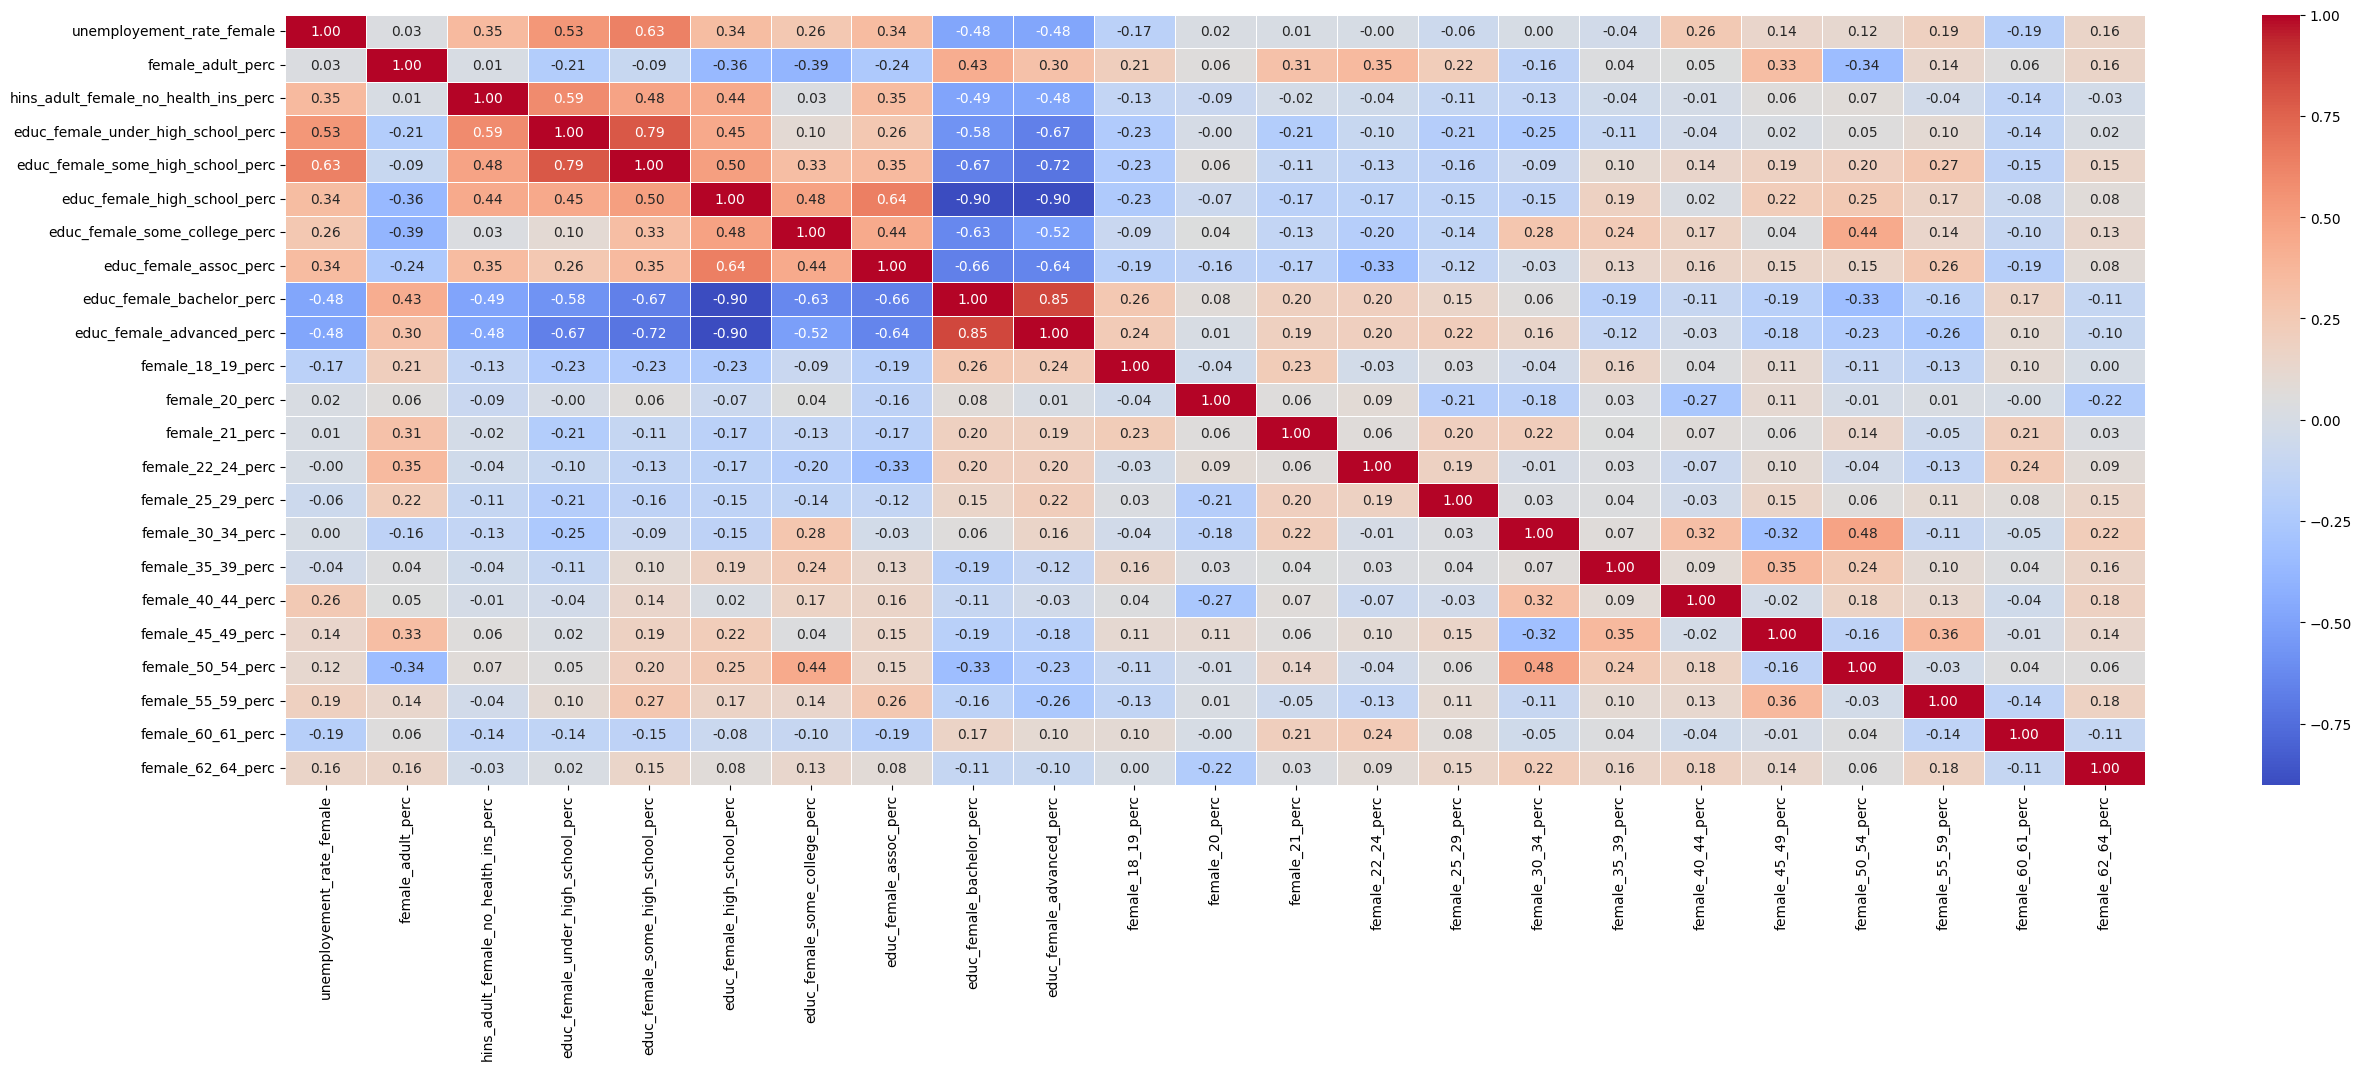

In [73]:

# discover any multicolinearlities that exist in all the female data
correlation_matrix_female = female_df.corr(method = 'pearson')
correlation_matrix_female


# additional notes, use seaborn heatmap to visualize correlation and step 2 should have been including the different ages and then doing this and running matrix

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(correlation_matrix_female, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

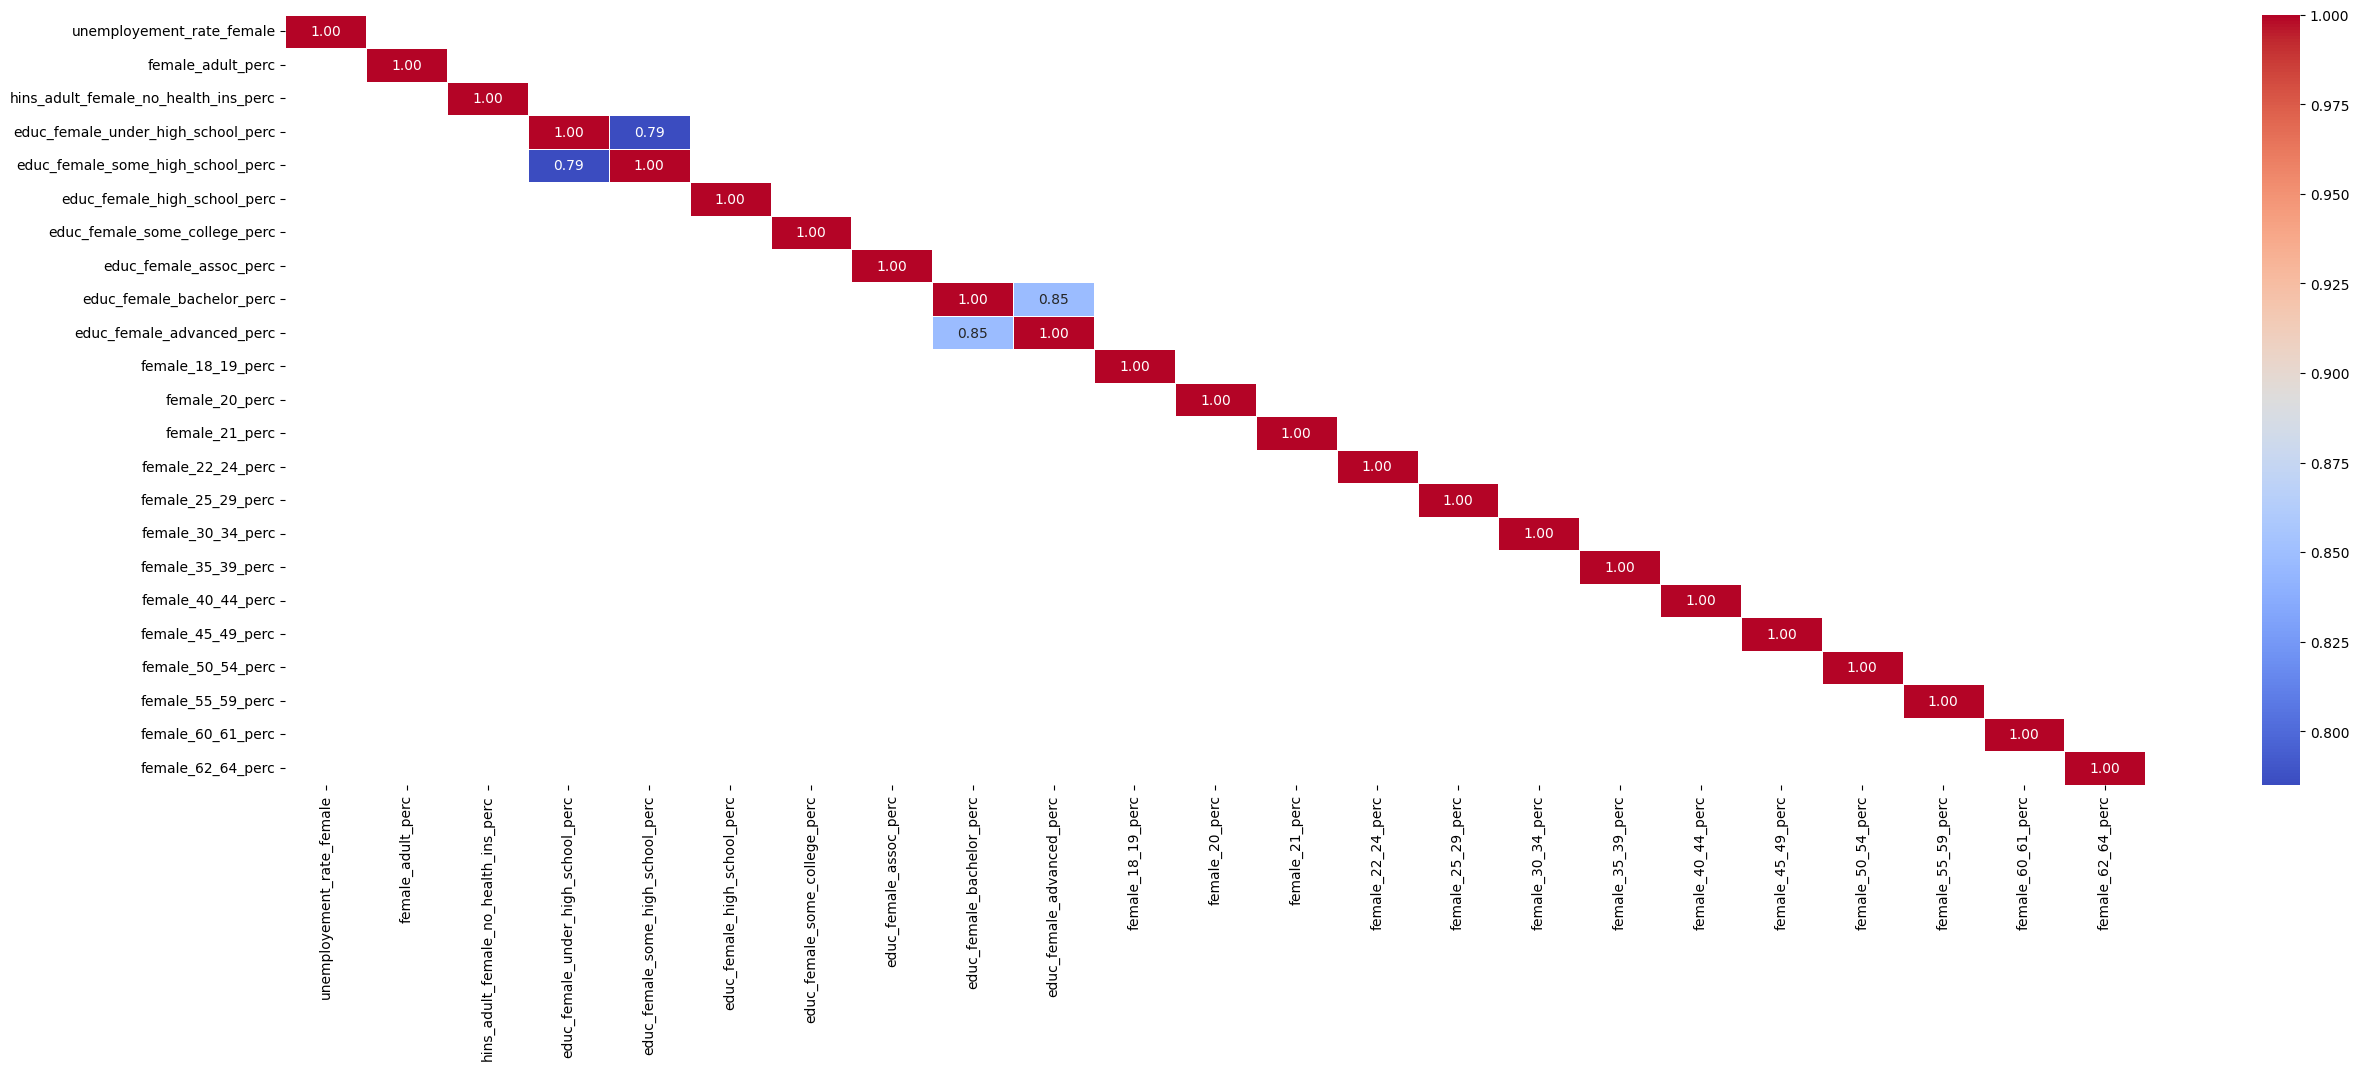

In [74]:
# show only correlations from the correlation values with a value of 0.7 and above

# Display correlations above a certain threshold (e.g., 0.7)
high_corr = correlation_matrix_female[correlation_matrix_female > 0.7]
high_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(high_corr,annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

 **Thought on this correlation matrix:**

 * I consider columns to potentially have multicolinearlity with a correlation value of 0.7 and above
 * Columns:
  * female with under highschool education and female with some highschool education
  * female with bachelor education and female with advance college education
* Based on these results, I think we could group the education columns into more general columns like below highschool education, highschool education, some college education, bachelor and above education




**Based on this, maybe we can remove some columns and have less predictor variables to use for the model.**

In [75]:
# Grouping the education columns that appear to be multicolinearility
female_df['educ_female_below_high_school_perc'] = (tmp['educ_female_none'] + tmp['educ_female_4th'] + tmp['educ_female_6th'] + tmp['educ_female_8th'] + tmp['educ_female_9th'] + tmp['educ_female_10th'] + tmp['educ_female_11th'] + tmp['educ_female_12th']) / tmp['educ_female_adult']
# already have highschool columns so skip that
female_df['educ_female_some_college_assoc_perc']= (tmp['educ_female_coll_1y'] + tmp['educ_female_coll_2y'] + tmp['educ_female_assoc_perc']) / tmp['educ_female_adult']
female_df['educ_female_bachelor_and_above_perc']= (tmp['educ_female_bachelor_perc'] + tmp['educ_female_masters'] + tmp['educ_female_prof'] + tmp['educ_female_phd']) / tmp['educ_female_adult']




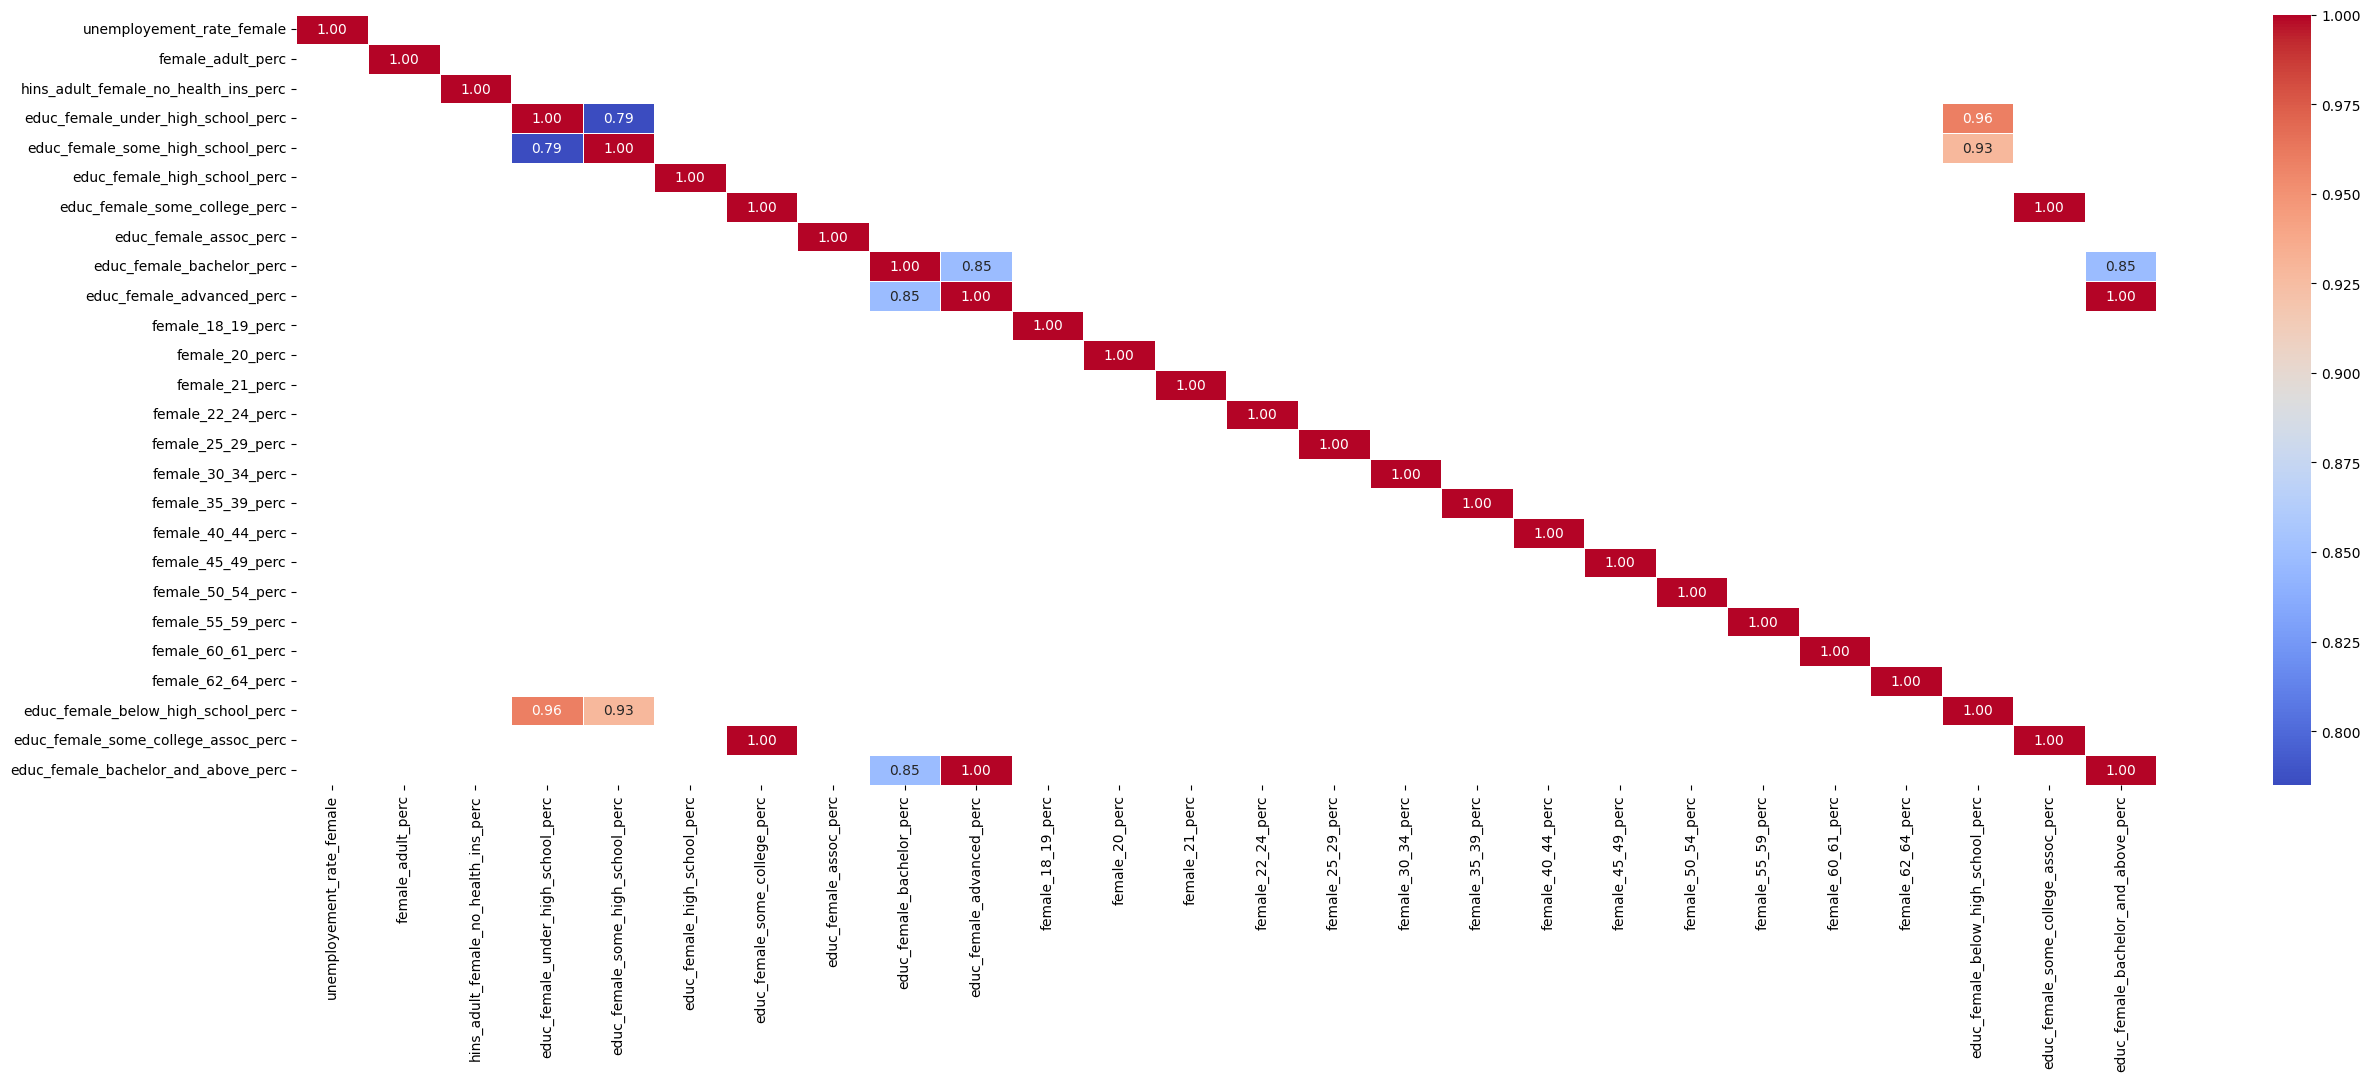

In [76]:
# re-run correlation matrix
correlation_matrix_female = female_df.corr(method = 'pearson')
correlation_matrix_female
high_corr = correlation_matrix_female[correlation_matrix_female > 0.7]
high_corr.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(high_corr,annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

# we can see that after grouping those columns together none of these new columns are correlated with each other so thats a good thing righ! they only correlated with the column we used to create them

In [77]:
# iteration 1: run model using only these new education columns

# creating formula for multilinear regression model
female_formula_1 = 'unemployement_rate_female ~  hins_adult_female_no_health_ins_perc + educ_female_below_high_school_perc + educ_female_high_school_perc + educ_female_some_college_assoc_perc + educ_female_bachelor_and_above_perc +  female_18_19_perc + female_20_perc + female_21_perc + female_22_24_perc + female_25_29_perc + female_30_34_perc+ female_35_39_perc  +  female_40_44_perc +  female_45_49_perc +  female_50_54_perc  +  female_55_59_perc  + female_60_61_perc  + female_62_64_perc'
# fit new model
female_model_1 = smf.ols(formula=female_formula_1, data=female_df).fit()
# show model summary statistics
print(female_model_1.summary())



                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.500
Model:                                   OLS   Adj. R-squared:                  0.440
Method:                        Least Squares   F-statistic:                     8.376
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           3.55e-15
Time:                               22:31:05   Log-Likelihood:                 416.40
No. Observations:                        170   AIC:                            -794.8
Df Residuals:                            151   BIC:                            -735.2
Df Model:                                 18                                         
Covariance Type:                   nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

next steps:
* remove no health insruance
* remove hs
* remove bachelo and above
* remove all age columns



In [78]:
# iteration 2:
# creating formula for multilinear regression model
female_formula_1 = 'unemployement_rate_female ~ educ_female_below_high_school_perc +  educ_female_some_college_assoc_perc'
# fit new model
female_model_1 = smf.ols(formula=female_formula_1, data=female_df).fit()
# show model summary statistics
print(female_model_1.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.389
Model:                                   OLS   Adj. R-squared:                  0.382
Method:                        Least Squares   F-statistic:                     54.83
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           3.79e-19
Time:                               22:31:05   Log-Likelihood:                 407.79
No. Observations:                        175   AIC:                            -809.6
Df Residuals:                            172   BIC:                            -800.1
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Thoughts on model:

*   all the features are stiatically significant, but correlation for each of the features are rather low in compairosn with what we found in vanilla model optimization results



## Optimization 2: group original columns into features I actually think will be useful for the model like young adult, adult, mid age adult, senior, no highschool diploma, highschool diploma, etc and rerun model*


In [79]:
# grouping the female age columns into useful age categories
female_df['total_female_young_adults'] = tmp[['female_18_19', 'female_20', 'female_21', 'female_22_24']].sum(axis=1)
female_df['total_young_adults'] = tmp[['total_18_19', 'total_20', 'total_21', 'total_22_24']].sum(axis=1)
female_df ['female_young_adults_perc'] = female_df['total_female_young_adults']/ female_df['total_young_adults']

female_df['total_female_adults'] = tmp[['female_25_29', 'female_30_34', 'female_35_39', 'female_40_44']].sum(axis=1)
female_df['total_adults'] = tmp[['total_25_29', 'total_30_34', 'total_35_39', 'total_40_44']].sum(axis=1)
female_df['female_adults_perc'] = female_df['total_female_adults']  / female_df['total_adults']

female_df['total_female_mid_age_adults'] = tmp[['female_45_49', 'female_50_54', 'female_55_59']].sum(axis=1)
female_df['total_mid_age_adults'] = tmp[['total_45_49', 'total_50_54', 'total_55_59']].sum(axis=1)
female_df['female_mid_age_perc'] = female_df['total_female_mid_age_adults'] / female_df['total_mid_age_adults']

female_df['total_female_senior'] =  tmp[['female_60_61', 'female_62_64']].sum(axis=1)
female_df['total_senior'] = tmp[['total_60_61', 'total_62_64']].sum(axis=1)
female_df['female_senior_perc'] = female_df['total_female_senior'] / female_df['total_senior']

# education columns were already grouped from before




In [80]:
# iteration 1: using all of these new columns above plus health insurance and adult percentage columns
# create model and run it
female_formula_2 = 'unemployement_rate_female ~ hins_adult_female_no_health_ins_perc + educ_female_below_high_school_perc + educ_female_high_school_perc + educ_female_some_college_assoc_perc + educ_female_bachelor_and_above_perc +  female_young_adults_perc + female_adults_perc + female_mid_age_perc+ female_senior_perc'

# fitting the model
female_model_2 = smf.ols(formula=female_formula_2, data=female_df).fit()

# model summary
print(female_model_2.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.451
Model:                                   OLS   Adj. R-squared:                  0.421
Method:                        Least Squares   F-statistic:                     14.97
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           1.36e-17
Time:                               22:31:05   Log-Likelihood:                 416.80
No. Observations:                        174   AIC:                            -813.6
Df Residuals:                            164   BIC:                            -782.0
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

next steps:
* no health insurance
* hs
* bachelor ad above
* age columns


goodish features:




In [113]:
# iteration 1: using all of these new columns above plus health insurance and adult percentage columns
# create model and run it
female_formula_2 = 'unemployement_rate_female ~educ_female_below_high_school_perc + educ_female_high_school_perc + educ_female_some_college_assoc_perc + educ_female_bachelor_and_above_perc'

# fitting the model
female_model_2 = smf.ols(formula=female_formula_2, data=female_df).fit()

# model summary

# model summary
print(female_model_2.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.390
Model:                                   OLS   Adj. R-squared:                  0.376
Method:                        Least Squares   F-statistic:                     27.20
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           1.87e-17
Time:                               22:34:50   Log-Likelihood:                 407.92
No. Observations:                        175   AIC:                            -805.8
Df Residuals:                            170   BIC:                            -790.0
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [82]:
# iteration 2: re-run model using the goodish features you found
female_formula_2 = 'unemployement_rate_female ~ educ_female_below_high_school_perc +  educ_female_some_college_assoc_perc'

# fitting the model
female_model_2 = smf.ols(formula=female_formula_2, data=female_df).fit()

# model summary
print(female_model_2.summary())

                                OLS Regression Results                               
Dep. Variable:     unemployement_rate_female   R-squared:                       0.389
Model:                                   OLS   Adj. R-squared:                  0.382
Method:                        Least Squares   F-statistic:                     54.83
Date:                       Thu, 07 Dec 2023   Prob (F-statistic):           3.79e-19
Time:                               22:31:05   Log-Likelihood:                 407.79
No. Observations:                        175   AIC:                            -809.6
Df Residuals:                            172   BIC:                            -800.1
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

**Thoughts on model:**
all of the features are statistically significant but coefficent valus are low and the same as the last model we created from optimization 2 literally exact.

## Optimization 3: checking distribution of columns using columns with histograms*

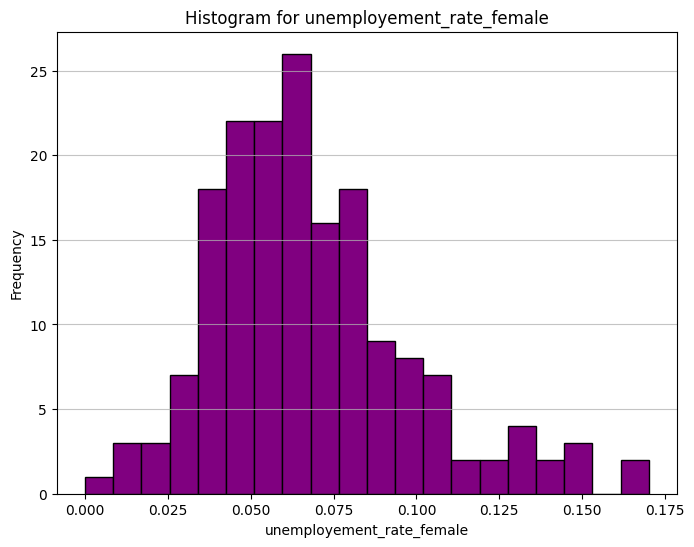

Descriptive Statistics for unemployement_rate_female column:
count    175.000000
mean       0.067908
std        0.030206
min        0.000000
25%        0.048038
50%        0.062742
75%        0.081675
max        0.170105
Name: unemployement_rate_female, dtype: float64


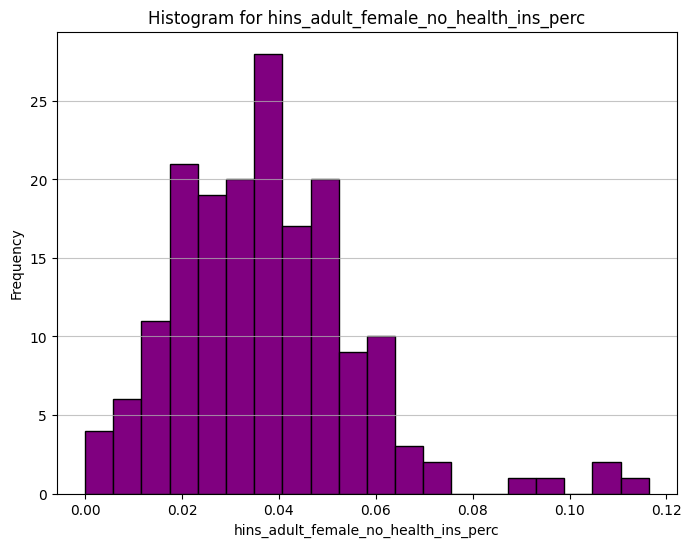

Descriptive Statistics for hins_adult_female_no_health_ins_perc column:
count    175.000000
mean       0.037343
std        0.019243
min        0.000000
25%        0.023691
50%        0.035637
75%        0.048187
max        0.116344
Name: hins_adult_female_no_health_ins_perc, dtype: float64


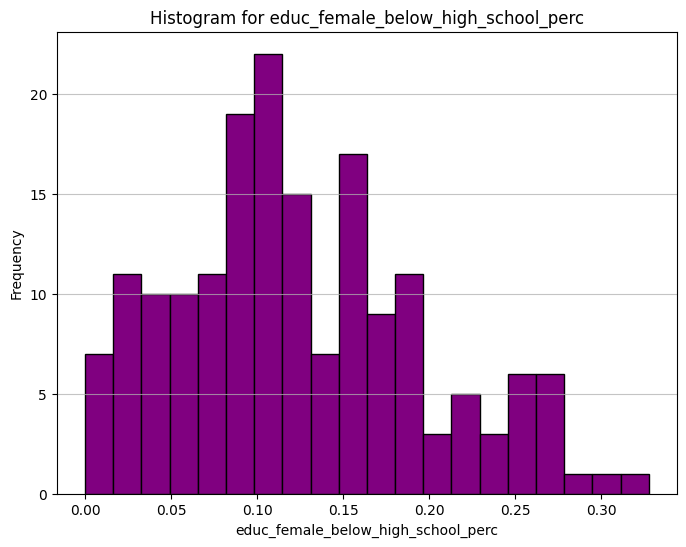

Descriptive Statistics for educ_female_below_high_school_perc column:
count    175.000000
mean       0.124204
std        0.072326
min        0.000000
25%        0.073538
50%        0.111899
75%        0.166768
max        0.327782
Name: educ_female_below_high_school_perc, dtype: float64


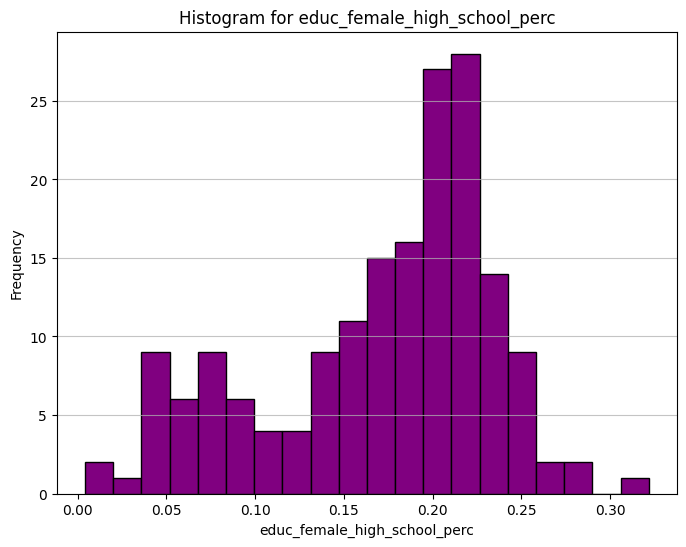

Descriptive Statistics for educ_female_high_school_perc column:
count    175.000000
mean       0.172237
std        0.063830
min        0.004242
25%        0.137528
50%        0.192943
75%        0.217697
max        0.321809
Name: educ_female_high_school_perc, dtype: float64


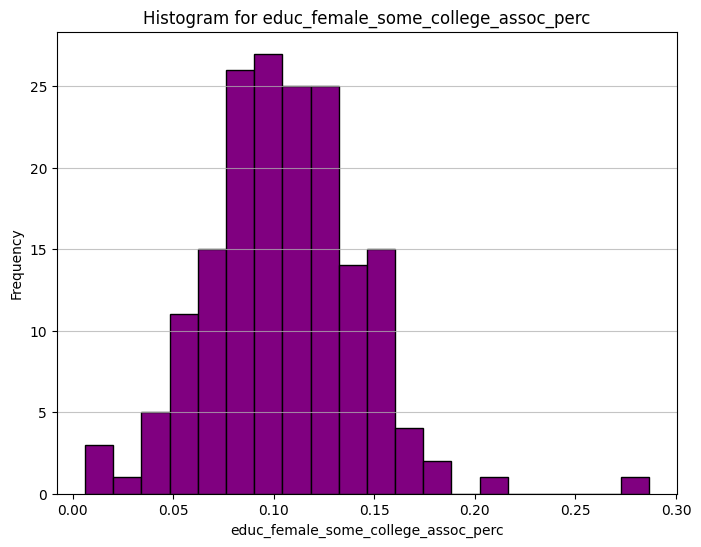

Descriptive Statistics for educ_female_some_college_assoc_perc column:
count    175.000000
mean       0.104481
std        0.037642
min        0.006069
25%        0.077806
50%        0.104028
75%        0.125640
max        0.286457
Name: educ_female_some_college_assoc_perc, dtype: float64


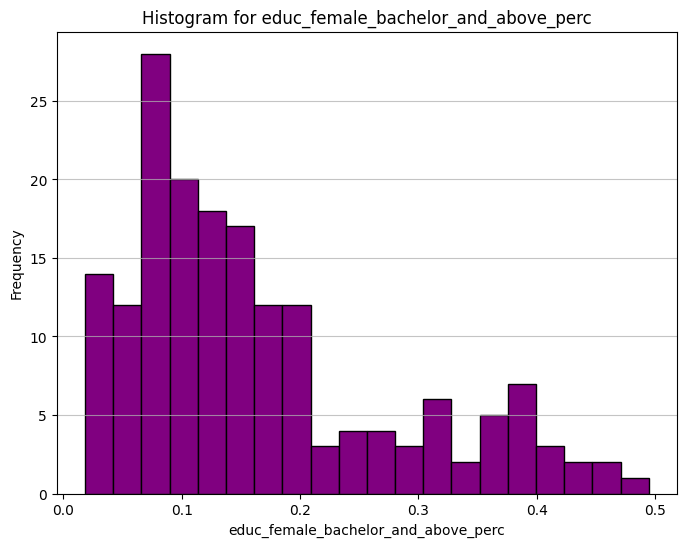

Descriptive Statistics for educ_female_bachelor_and_above_perc column:
count    175.000000
mean       0.163921
std        0.112216
min        0.018355
25%        0.083022
50%        0.129318
75%        0.202266
max        0.494656
Name: educ_female_bachelor_and_above_perc, dtype: float64


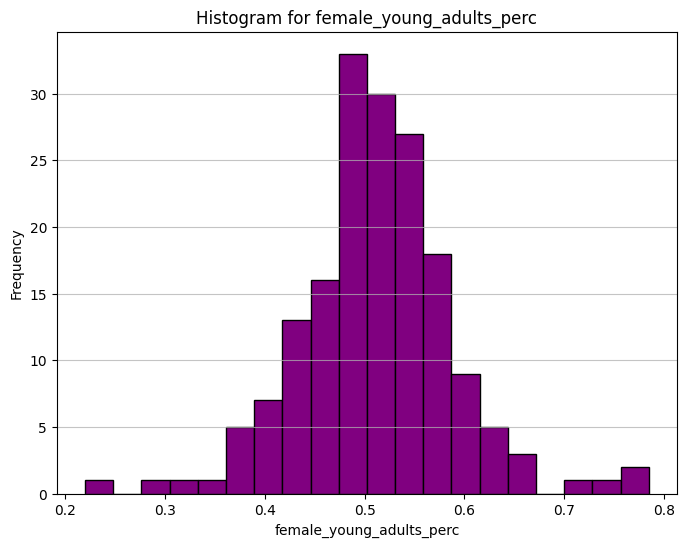

Descriptive Statistics for female_young_adults_perc column:
count    174.000000
mean       0.512117
std        0.077544
min        0.220000
25%        0.472410
50%        0.511198
75%        0.553943
max        0.784530
Name: female_young_adults_perc, dtype: float64


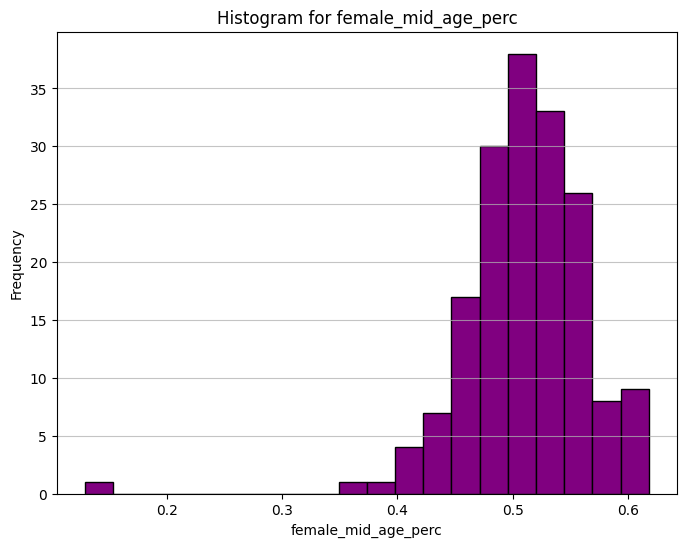

Descriptive Statistics for female_mid_age_perc column:
count    175.000000
mean       0.509634
std        0.054757
min        0.129032
25%        0.482513
50%        0.511968
75%        0.543247
max        0.617932
Name: female_mid_age_perc, dtype: float64


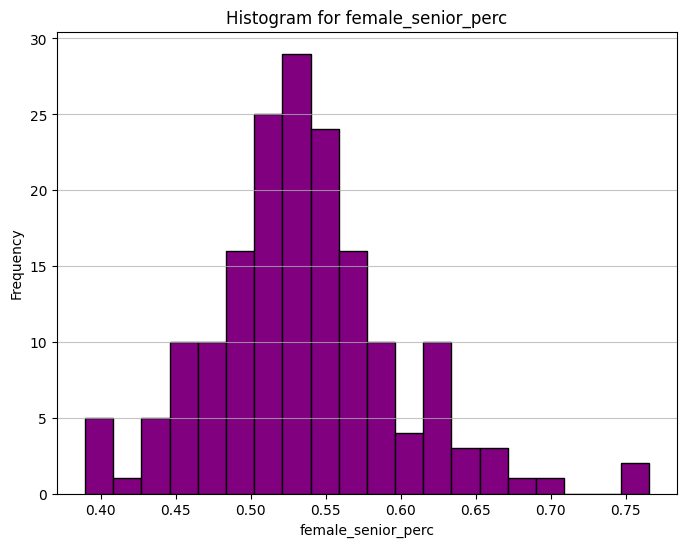

Descriptive Statistics for female_senior_perc column:
count    175.000000
mean       0.533655
std        0.062342
min        0.389441
25%        0.499600
50%        0.529785
75%        0.563803
max        0.765217
Name: female_senior_perc, dtype: float64


In [83]:
# using the grouped columns from before
columns_to_plot = [ 'unemployement_rate_female',  'hins_adult_female_no_health_ins_perc',
                   'educ_female_below_high_school_perc', 'educ_female_high_school_perc' , 'educ_female_some_college_assoc_perc', 'educ_female_bachelor_and_above_perc', 'female_young_adults_perc', 'female_mid_age_perc',
                   'female_senior_perc']

# Create histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(female_df[column], bins=20, color='purple', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # print descriptive statistic for each column
    print(f'Descriptive Statistics for {column} column:')
    print(female_df[column].describe())

In [84]:
# make a copy of female_df in case we mess up with scaling
female_df_copy = female_df

In [85]:


# scale the columns
# this ensures that a feature does not dominate because it has a large scale
columns_to_scale = ['unemployement_rate_female',  'hins_adult_female_no_health_ins_perc',
                     'educ_female_below_high_school_perc', 'educ_female_high_school_perc' , 'educ_female_some_college_assoc_perc', 'educ_female_bachelor_and_above_perc', 'female_young_adults_perc',
                     'female_mid_age_perc', 'female_senior_perc']

# Iterate over columns and create new scaled columns
for column in columns_to_scale:
    min_value = female_df_copy[column].min()
    max_value = female_df_copy[column].max()
    new_column_name = 'scaled_' + column
    female_df_copy[new_column_name] = (female_df_copy[column] - min_value) / (max_value - min_value)

female_df_copy





,unemployement_rate_female,female_adult_perc,hins_adult_female_no_health_ins_perc,educ_female_under_high_school_perc,educ_female_some_high_school_perc,educ_female_high_school_perc,educ_female_some_college_perc,educ_female_assoc_perc,educ_female_bachelor_perc,educ_female_advanced_perc,...,female_senior_perc,scaled_unemployement_rate_female,scaled_hins_adult_female_no_health_ins_perc,scaled_educ_female_below_high_school_perc,scaled_educ_female_high_school_perc,scaled_educ_female_some_college_assoc_perc,scaled_educ_female_bachelor_and_above_perc,scaled_female_young_adults_perc,scaled_female_mid_age_perc,scaled_female_senior_perc
0,0.036258,0.412186,0.018547,0.024510,0.035643,0.075025,0.087155,0.043370,0.411349,0.247923,...,0.522961,0.213148,0.159413,0.183515,0.222890,0.289204,0.482052,0.779290,0.770591,0.355318
1,0.077744,0.315492,0.033282,0.184733,0.100036,0.140162,0.076694,0.042293,0.210937,0.104982,...,0.589166,0.457034,0.286068,0.868778,0.428003,0.251887,0.181887,0.499846,0.710900,0.531501
2,0.065268,0.396588,0.016929,0.022292,0.007006,0.042408,0.056313,0.025370,0.436070,0.368133,...,0.499624,0.383691,0.145507,0.089382,0.120180,0.179199,0.734412,0.641277,0.623003,0.293215
3,0.038490,0.353493,0.011915,0.000000,0.000000,0.004242,0.006061,0.014545,0.619394,0.351515,...,0.402235,0.226272,0.102411,0.000000,0.000000,0.000000,0.700262,1.000000,0.852748,0.034047
4,0.028759,0.461503,0.010750,0.001072,0.000000,0.055466,0.008842,0.002947,0.567256,0.308950,...,0.765217,0.169068,0.092397,0.003270,0.161301,0.009893,0.610426,0.680912,0.450246,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.097761,0.294306,0.060151,0.091879,0.071698,0.231698,0.118359,0.060213,0.114487,0.079967,...,0.542018,0.574708,0.517005,0.499042,0.716246,0.400487,0.129363,0.549084,0.844334,0.406031
173,0.076283,0.314583,0.041113,0.085546,0.066526,0.197005,0.135073,0.081228,0.164844,0.072774,...,0.568831,0.448449,0.353370,0.463943,0.606997,0.460116,0.114285,0.355792,0.820830,0.477386
174,0.076494,0.345162,0.035862,0.078310,0.070845,0.195211,0.094085,0.084648,0.154507,0.127183,...,0.508341,0.449685,0.308240,0.455043,0.601351,0.313947,0.228531,0.608012,0.965112,0.316411
175,0.030650,0.290701,0.023507,0.040067,0.052410,0.169181,0.120690,0.048981,0.196611,0.202880,...,0.451699,0.180182,0.202045,0.282128,0.519383,0.408809,0.387453,0.387102,0.754385,0.165679


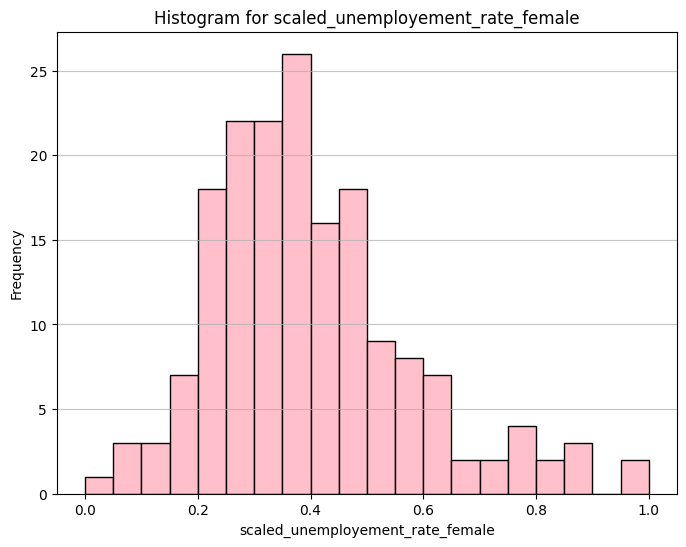

Descriptive Statistics for scaled_unemployement_rate_female column:
count    175.000000
mean       0.399212
std        0.177573
min        0.000000
25%        0.282400
50%        0.368841
75%        0.480146
max        1.000000
Name: scaled_unemployement_rate_female, dtype: float64


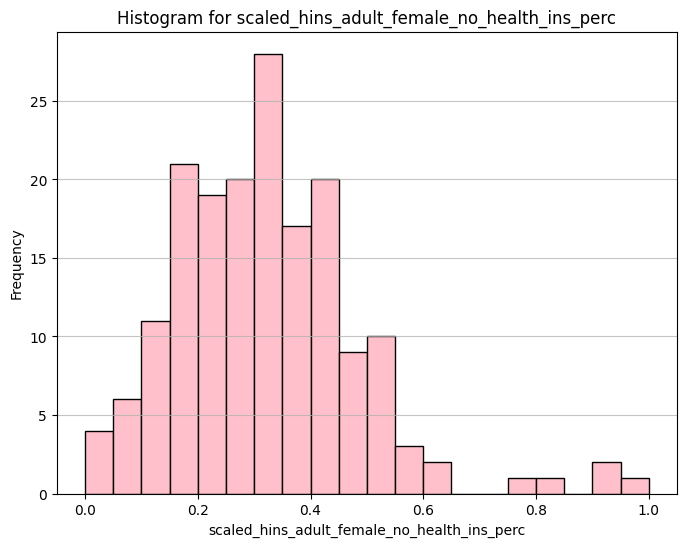

Descriptive Statistics for scaled_hins_adult_female_no_health_ins_perc column:
count    175.000000
mean       0.320967
std        0.165400
min        0.000000
25%        0.203633
50%        0.306305
75%        0.414180
max        1.000000
Name: scaled_hins_adult_female_no_health_ins_perc, dtype: float64


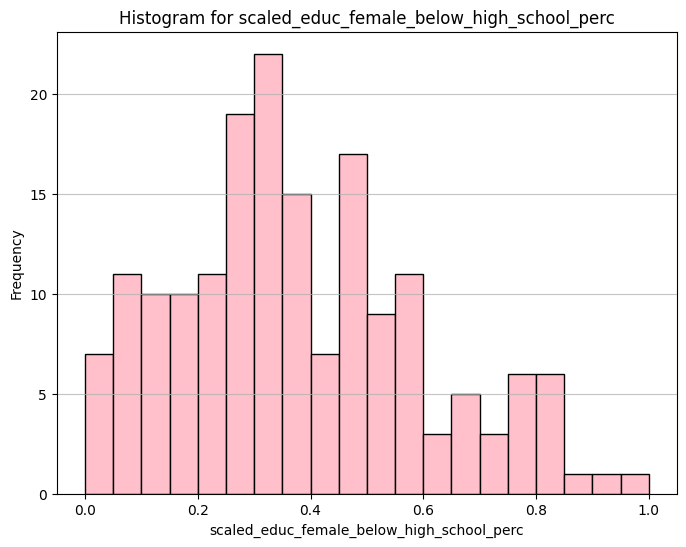

Descriptive Statistics for scaled_educ_female_below_high_school_perc column:
count    175.000000
mean       0.378922
std        0.220652
min        0.000000
25%        0.224352
50%        0.341383
75%        0.508779
max        1.000000
Name: scaled_educ_female_below_high_school_perc, dtype: float64


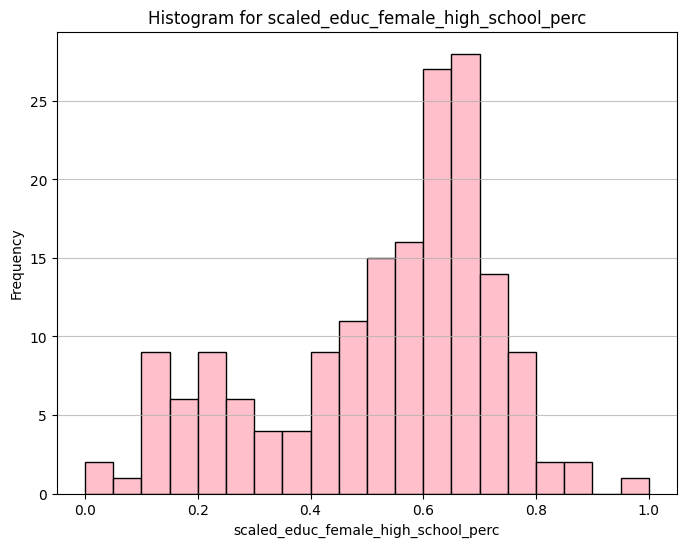

Descriptive Statistics for scaled_educ_female_high_school_perc column:
count    175.000000
mean       0.529004
std        0.200997
min        0.000000
25%        0.419709
50%        0.594207
75%        0.672156
max        1.000000
Name: scaled_educ_female_high_school_perc, dtype: float64


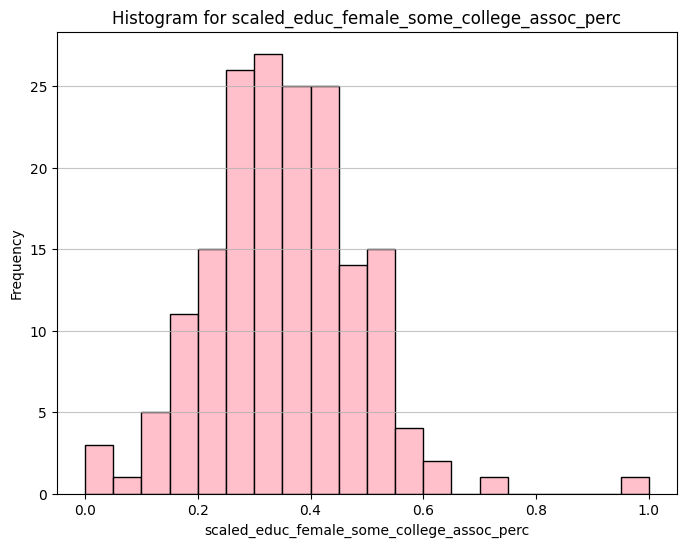

Descriptive Statistics for scaled_educ_female_some_college_assoc_perc column:
count    175.000000
mean       0.350982
std        0.134248
min        0.000000
25%        0.255847
50%        0.349370
75%        0.426448
max        1.000000
Name: scaled_educ_female_some_college_assoc_perc, dtype: float64


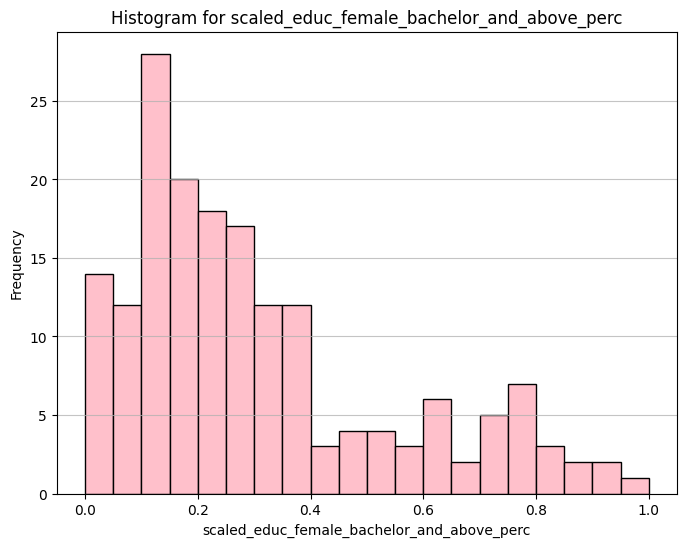

Descriptive Statistics for scaled_educ_female_bachelor_and_above_perc column:
count    175.000000
mean       0.305617
std        0.235600
min        0.000000
25%        0.135769
50%        0.232968
75%        0.386123
max        1.000000
Name: scaled_educ_female_bachelor_and_above_perc, dtype: float64


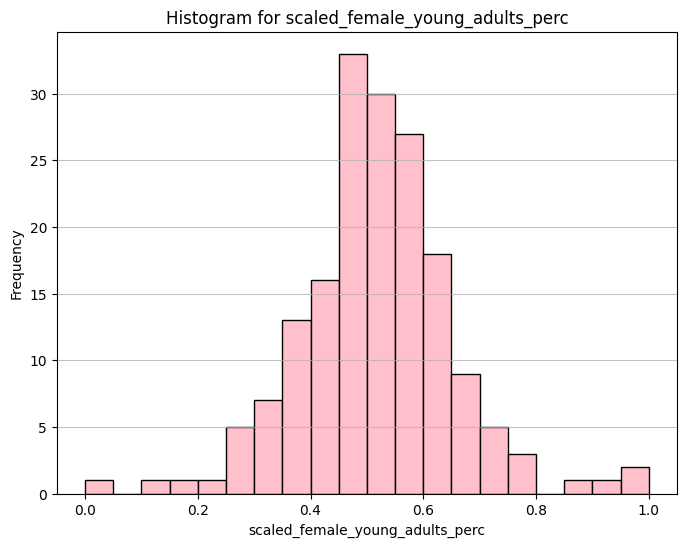

Descriptive Statistics for scaled_female_young_adults_perc column:
count    174.000000
mean       0.517452
std        0.137360
min        0.000000
25%        0.447115
50%        0.515824
75%        0.591542
max        1.000000
Name: scaled_female_young_adults_perc, dtype: float64


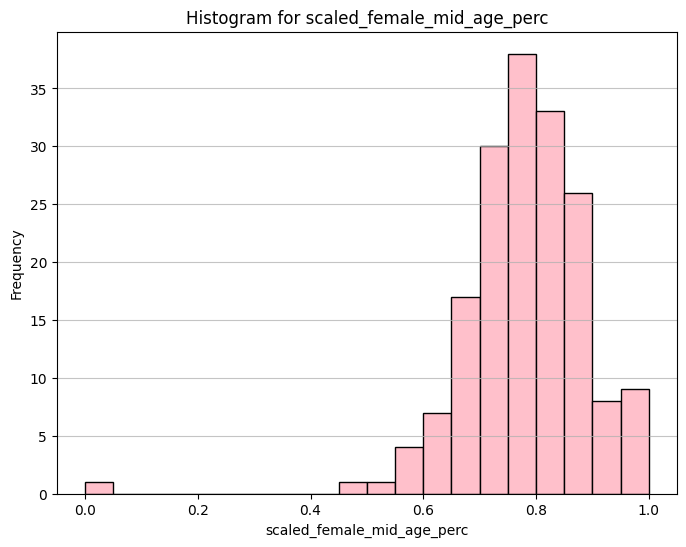

Descriptive Statistics for scaled_female_mid_age_perc column:
count    175.000000
mean       0.778487
std        0.112000
min        0.000000
25%        0.723013
50%        0.783260
75%        0.847237
max        1.000000
Name: scaled_female_mid_age_perc, dtype: float64


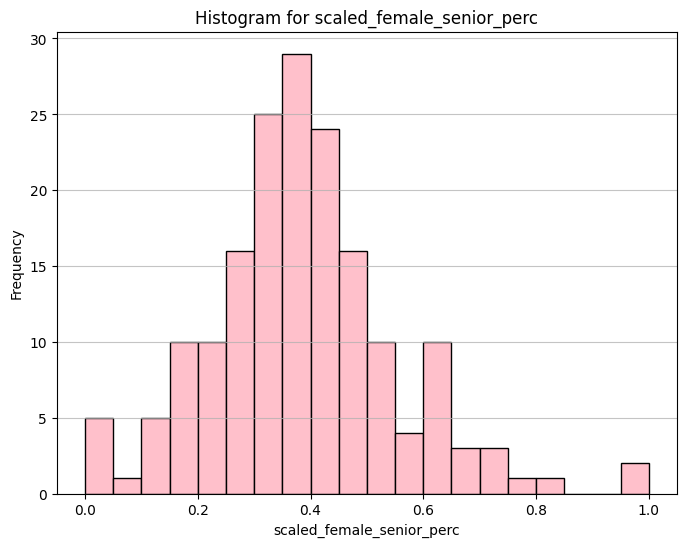

Descriptive Statistics for scaled_female_senior_perc column:
count    175.000000
mean       0.383778
std        0.165902
min        0.000000
25%        0.293150
50%        0.373477
75%        0.464004
max        1.000000
Name: scaled_female_senior_perc, dtype: float64


In [86]:
# re-run histogram and observe the effects of scaling
scaled_columns_to_plot = [ 'scaled_unemployement_rate_female','scaled_hins_adult_female_no_health_ins_perc',
                   'scaled_educ_female_below_high_school_perc', 'scaled_educ_female_high_school_perc' , 'scaled_educ_female_some_college_assoc_perc', 'scaled_educ_female_bachelor_and_above_perc', 'scaled_female_young_adults_perc', 'scaled_female_mid_age_perc',
                   'scaled_female_senior_perc']

# Create histograms for each column
for column in scaled_columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(female_df_copy[column], bins=20, color='pink', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

      # print descriptive statistic for each column
    print(f'Descriptive Statistics for {column} column:')
    print(female_df_copy[column].describe())

In [87]:
# iteration 1: run the model again using these scaled features

# create model and run it
female_formula_3 = 'scaled_unemployement_rate_female ~  scaled_hins_adult_female_no_health_ins_perc + scaled_educ_female_below_high_school_perc + scaled_educ_female_high_school_perc + scaled_educ_female_some_college_assoc_perc + scaled_educ_female_bachelor_and_above_perc + scaled_female_young_adults_perc + scaled_female_mid_age_perc + scaled_female_senior_perc'

# fitting the model
female_model_3 = smf.ols(formula=female_formula_3, data=female_df_copy).fit()

# model summary
print(female_model_3.summary())

                                   OLS Regression Results                                   
Dep. Variable:     scaled_unemployement_rate_female   R-squared:                       0.415
Model:                                          OLS   Adj. R-squared:                  0.387
Method:                               Least Squares   F-statistic:                     14.65
Date:                              Thu, 07 Dec 2023   Prob (F-statistic):           4.46e-16
Time:                                      22:31:11   Log-Likelihood:                 103.12
No. Observations:                               174   AIC:                            -188.2
Df Residuals:                                   165   BIC:                            -159.8
Df Model:                                         8                                         
Covariance Type:                          nonrobust                                         
                                                  coef    std err     

Next Steps:
* remoce health insurance
* remove hs
* remove age columns
* remove bachelor and above





In [88]:
# iteration 2: using the goofish features from the previous model

# create model and run it
female_formula_3 = 'scaled_unemployement_rate_female ~  scaled_educ_female_below_high_school_perc + scaled_educ_female_some_college_assoc_perc '

# fitting the model
female_model_3 = smf.ols(formula=female_formula_3, data=female_df_copy).fit()

# model summary
print(female_model_3.summary())

                                   OLS Regression Results                                   
Dep. Variable:     scaled_unemployement_rate_female   R-squared:                       0.389
Model:                                          OLS   Adj. R-squared:                  0.382
Method:                               Least Squares   F-statistic:                     54.83
Date:                              Thu, 07 Dec 2023   Prob (F-statistic):           3.79e-19
Time:                                      22:31:11   Log-Likelihood:                 97.810
No. Observations:                               175   AIC:                            -189.6
Df Residuals:                                   172   BIC:                            -180.1
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                                 coef    std err      

Thoughts on model using scaled features:


* all features were statistically significant or close enough
* interesting and also we have pretty high coefficent values in comparison with the other models interesting indeed!
* compare it with rest of the models





# Male Linear Regression Modeling



**Independent variables:**
'male_adult_perc, hins_adult_male_health_ins_perc,hins_adult_male_no_health_ins_perc, educ_male_under_high_school_perc, educ_male_some_high_school_perc, educ_male_high_school_perc, educ_male_some_college_perc, educ_male_assoc_perc, educ_male_bachelor_perc, educ_male_advanced_perc, male_18_19_perc, male_20_perc, male_21_perc, male_22_24_perc, male_25_29_perc, male_30_34_perc, male_35_39_perc, male_40_44_perc, male_45_49_perc, male_50_54_perc, male_55_59_perc,male_60_61_perc, male_62_64_perc'

**Dependent variables:**
'unemployement_rate_male'

## Vanilla Male Model with all the independent variables above


In [89]:
# simplify male  dataframe to only columns we will use
male_df = male_df[['unemployement_rate_male','male_adult_perc', 'hins_adult_male_health_ins_perc' , 'hins_adult_male_no_health_ins_perc', 'educ_male_under_high_school_perc', 'educ_male_some_high_school_perc', 'educ_male_high_school_perc', 'educ_male_some_college_perc', 'educ_male_assoc_perc','educ_male_bachelor_perc', 'educ_male_advanced_perc', 'male_18_19_perc', 'male_20_perc', 'male_21_perc', 'male_22_24_perc', 'male_25_29_perc', 'male_30_34_perc', 'male_35_39_perc', 'male_40_44_perc', 'male_45_49_perc', 'male_50_54_perc', 'male_55_59_perc', 'male_60_61_perc', 'male_62_64_perc']]

In [90]:
# create formula
male_formula= 'unemployement_rate_male ~  hins_adult_male_no_health_ins_perc + educ_male_under_high_school_perc + educ_male_some_high_school_perc + educ_male_high_school_perc + educ_male_some_college_perc + educ_male_assoc_perc + educ_male_bachelor_perc + educ_male_advanced_perc + male_18_19_perc + male_20_perc + male_21_perc + male_22_24_perc + male_25_29_perc + male_30_34_perc + male_35_39_perc + male_40_44_perc + male_45_49_perc + male_50_54_perc + male_55_59_perc + male_60_61_perc + male_62_64_perc'

In [91]:
# fit the model
male_model = smf.ols(formula=male_formula, data=male_df).fit()

In [92]:
# model summary report
print(male_model.summary())


                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.537
Model:                                 OLS   Adj. R-squared:                  0.475
Method:                      Least Squares   F-statistic:                     8.654
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           1.66e-16
Time:                             22:31:11   Log-Likelihood:                 395.14
No. Observations:                      170   AIC:                            -748.3
Df Residuals:                          149   BIC:                            -682.4
Df Model:                               20                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### Thoughts on the first iteration of this model:

* remove health insurance
* remove age columns





## Optimization 0: optimizing vanilla model by removing again and again the non-statistical significant features *

In [93]:
# iteration 1: using goodish features we found from vanilla model for this new model

male_formula_0= 'unemployement_rate_male ~ educ_male_under_high_school_perc + educ_male_some_high_school_perc + educ_male_high_school_perc + educ_male_some_college_perc + educ_male_assoc_perc + educ_male_bachelor_perc + educ_male_advanced_perc'
male_model_0 = smf.ols(formula=male_formula_0, data=male_df).fit()
print(male_model_0.summary())


                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.462
Model:                                 OLS   Adj. R-squared:                  0.443
Method:                      Least Squares   F-statistic:                     24.09
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           1.82e-20
Time:                             22:31:11   Log-Likelihood:                 390.09
No. Observations:                      175   AIC:                            -766.2
Df Residuals:                          168   BIC:                            -744.0
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

**Thoughts on model:**


*   remove under hs
* remove hs
* all the other features not too bad





In [94]:
# iteration 3: using goodish features we found from vanilla model for this new model

male_formula_0= 'unemployement_rate_male ~ educ_male_some_high_school_perc + educ_male_some_college_perc + educ_male_assoc_perc + educ_male_bachelor_perc + educ_male_advanced_perc'
male_model_0 = smf.ols(formula=male_formula_0, data=male_df).fit()
print(male_model_0.summary())


                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.461
Model:                                 OLS   Adj. R-squared:                  0.445
Method:                      Least Squares   F-statistic:                     28.93
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           3.89e-21
Time:                             22:31:11   Log-Likelihood:                 389.88
No. Observations:                      175   AIC:                            -767.8
Df Residuals:                          169   BIC:                            -748.8
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Optimization 1: Discovering any multicolinearility that exists, combine those columns, and re-running the models with those combined columns*


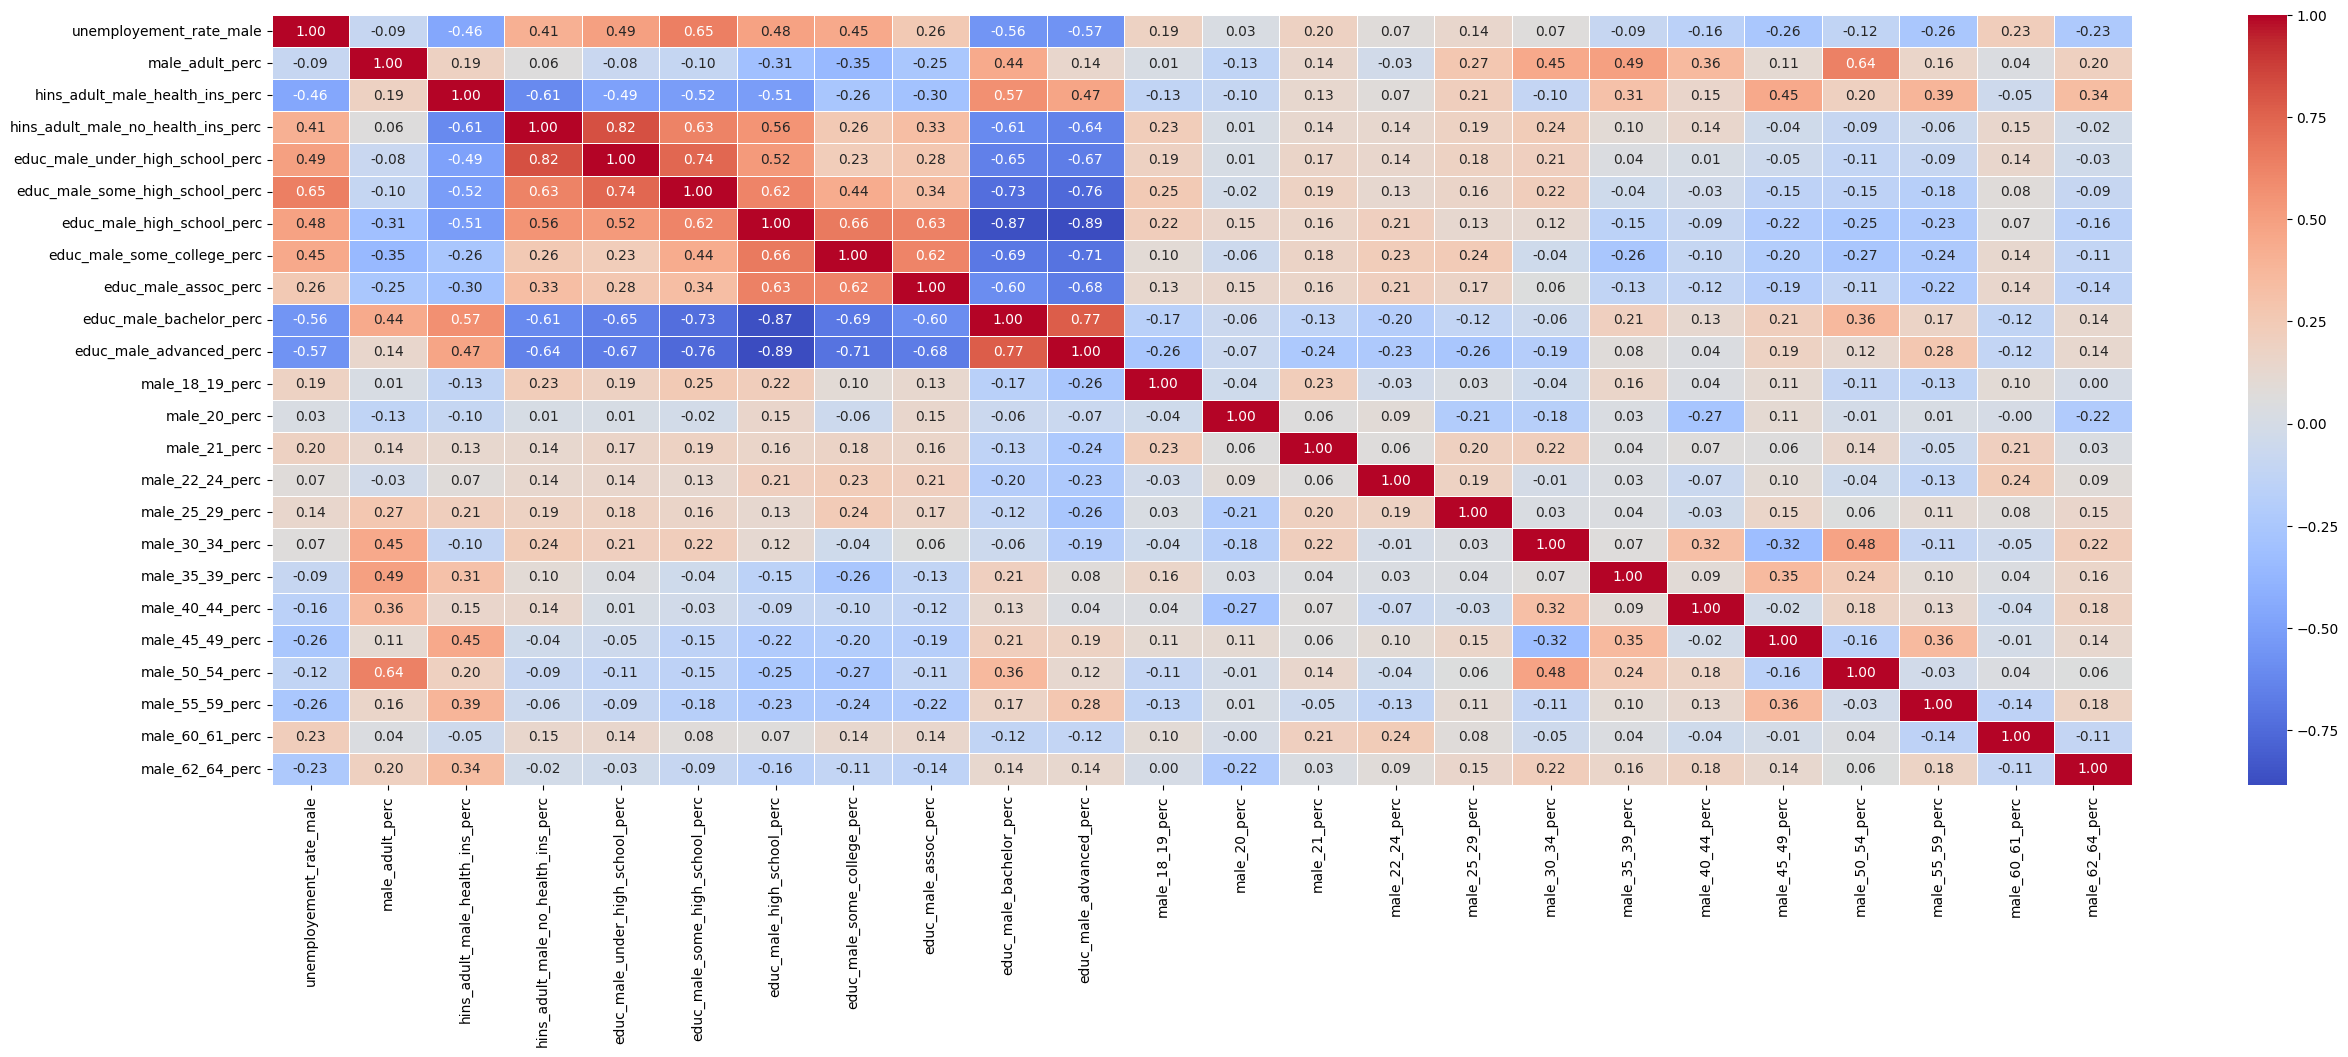

In [95]:

# discover any multicolinearlities that exist in the male data
correlation_matrix_male = male_df.corr(method = 'pearson')
correlation_matrix_male

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(correlation_matrix_male, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


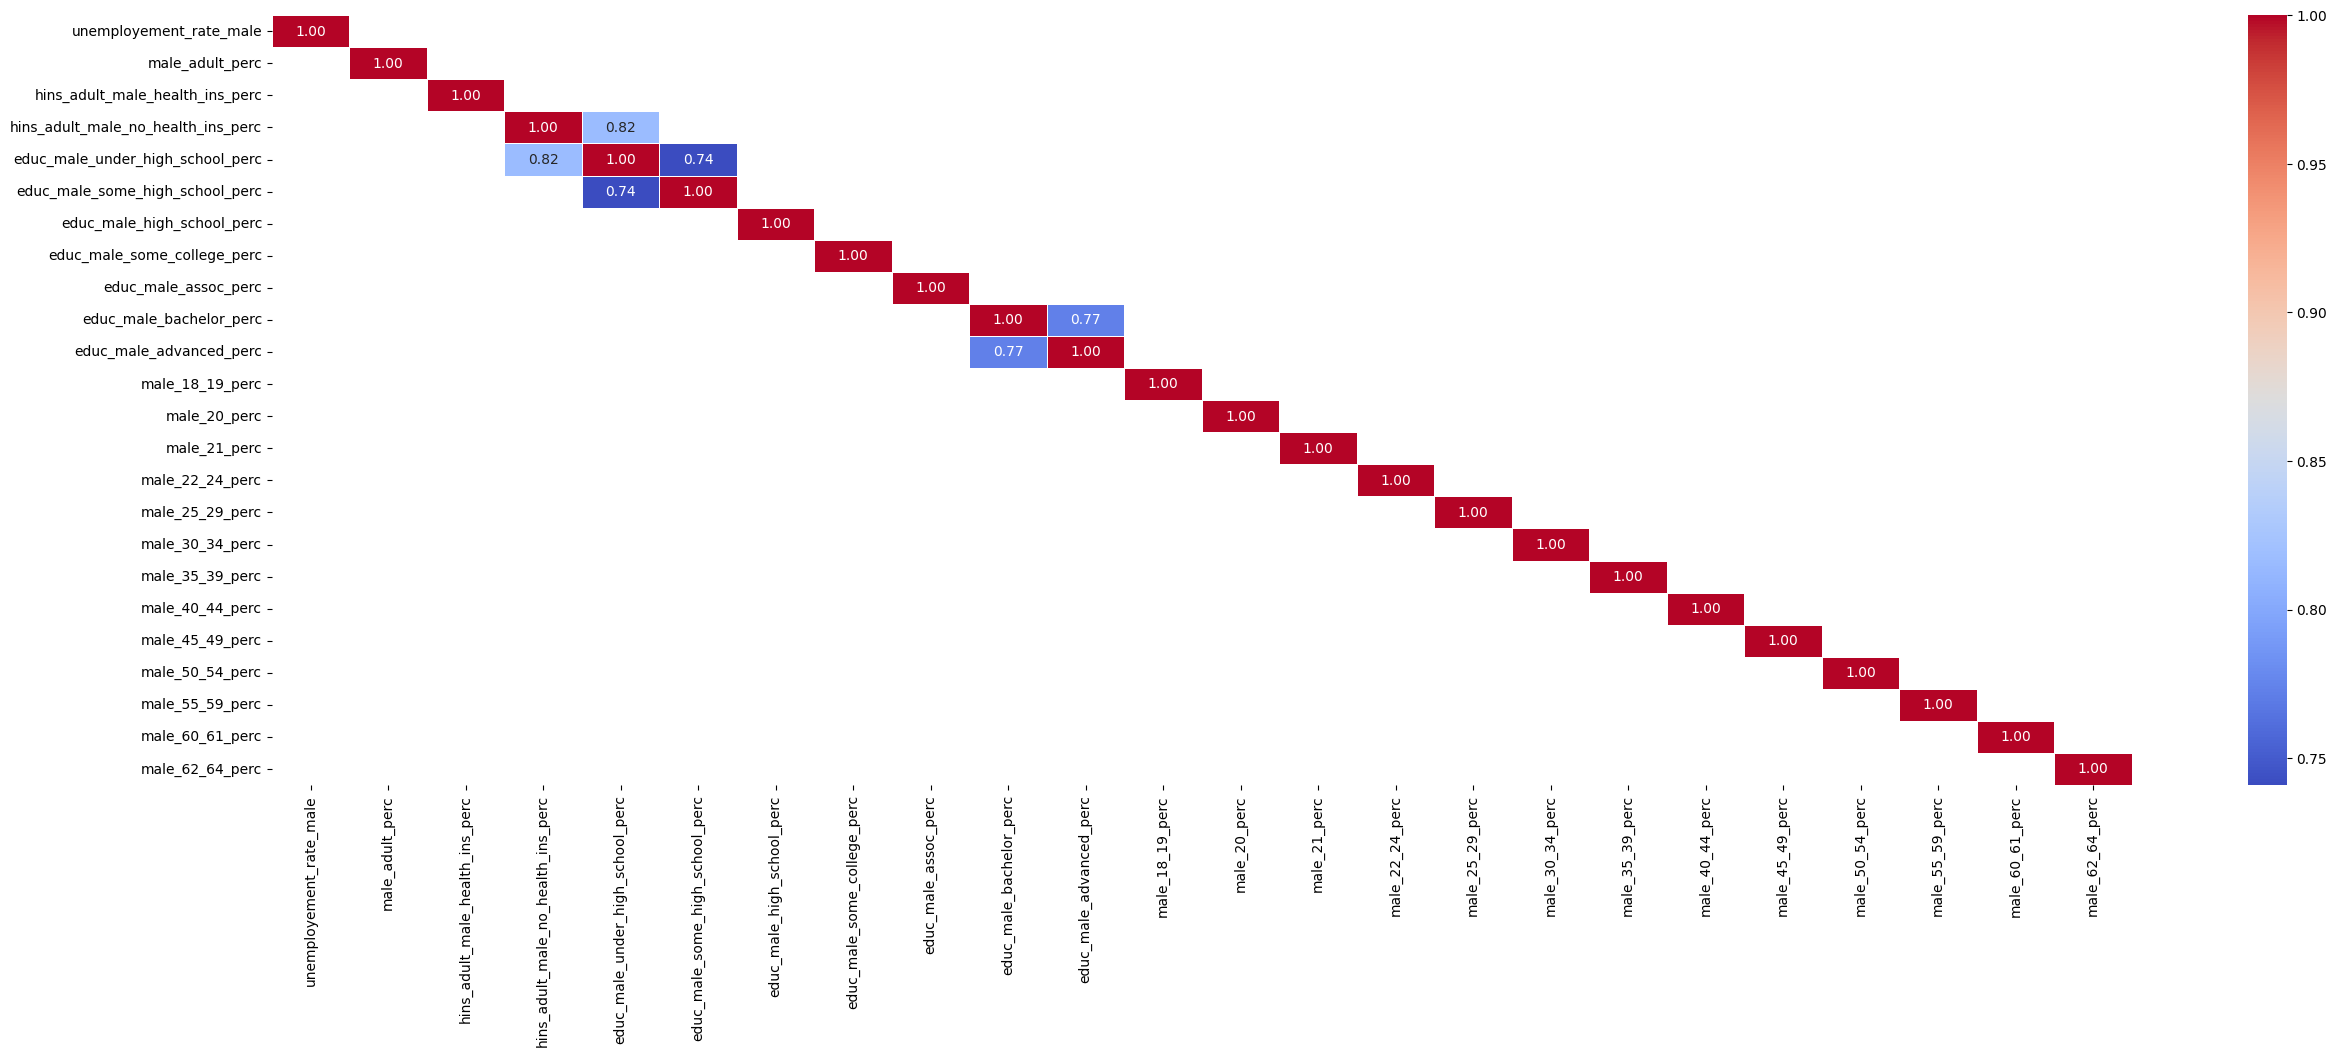

In [96]:
# show only correlations from the correlation values with a value of 0.7 and above

# Display correlations above a certain threshold (e.g., 0.7)
high_corr_male = correlation_matrix_male[correlation_matrix_male > 0.7]
high_corr_male.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(high_corr_male,annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

### Notes on correlation matrix:

*  Strong correlation relationship
  * men with education below highschool level and men with some highschool education level
  * men with bachelors and men with advanced degrees
  * men with education below hs level and men without health insurance
* Next steps from these results:
  * combine the education columns into more general columsn like below hs education (includes some and under hs), hs education (remains), some college(now includes both associates and some college columns0, and bachelors and above (includes both bachelors and advanced columns)
  * run correlation matrix again and see if this fixes the multicolinealrity issue
  * run a model with these new features and iterate again and again until the features mainly are statistically significant  

In [97]:
# Grouping the education columns that appear to be multicolinearility
male_df['educ_male_below_high_school_perc'] = (tmp['educ_male_none'] + tmp['educ_male_4th'] + tmp['educ_male_6th'] + tmp['educ_male_8th'] + tmp['educ_male_9th'] + tmp['educ_male_10th'] + tmp['educ_male_11th'] + tmp['educ_male_12th']) / tmp['educ_male_adult']
# already have highschool columns so skip that
male_df['educ_male_some_college_assoc_perc']= (tmp['educ_male_coll_1y'] + tmp['educ_male_coll_2y'] + tmp['educ_male_assoc_perc']) / tmp['educ_male_adult']
male_df['educ_male_bachelor_and_above_perc']= (tmp['educ_male_bachelor_perc'] + tmp['educ_male_masters'] + tmp['educ_male_prof'] + tmp['educ_male_phd']) / tmp['educ_male_adult']




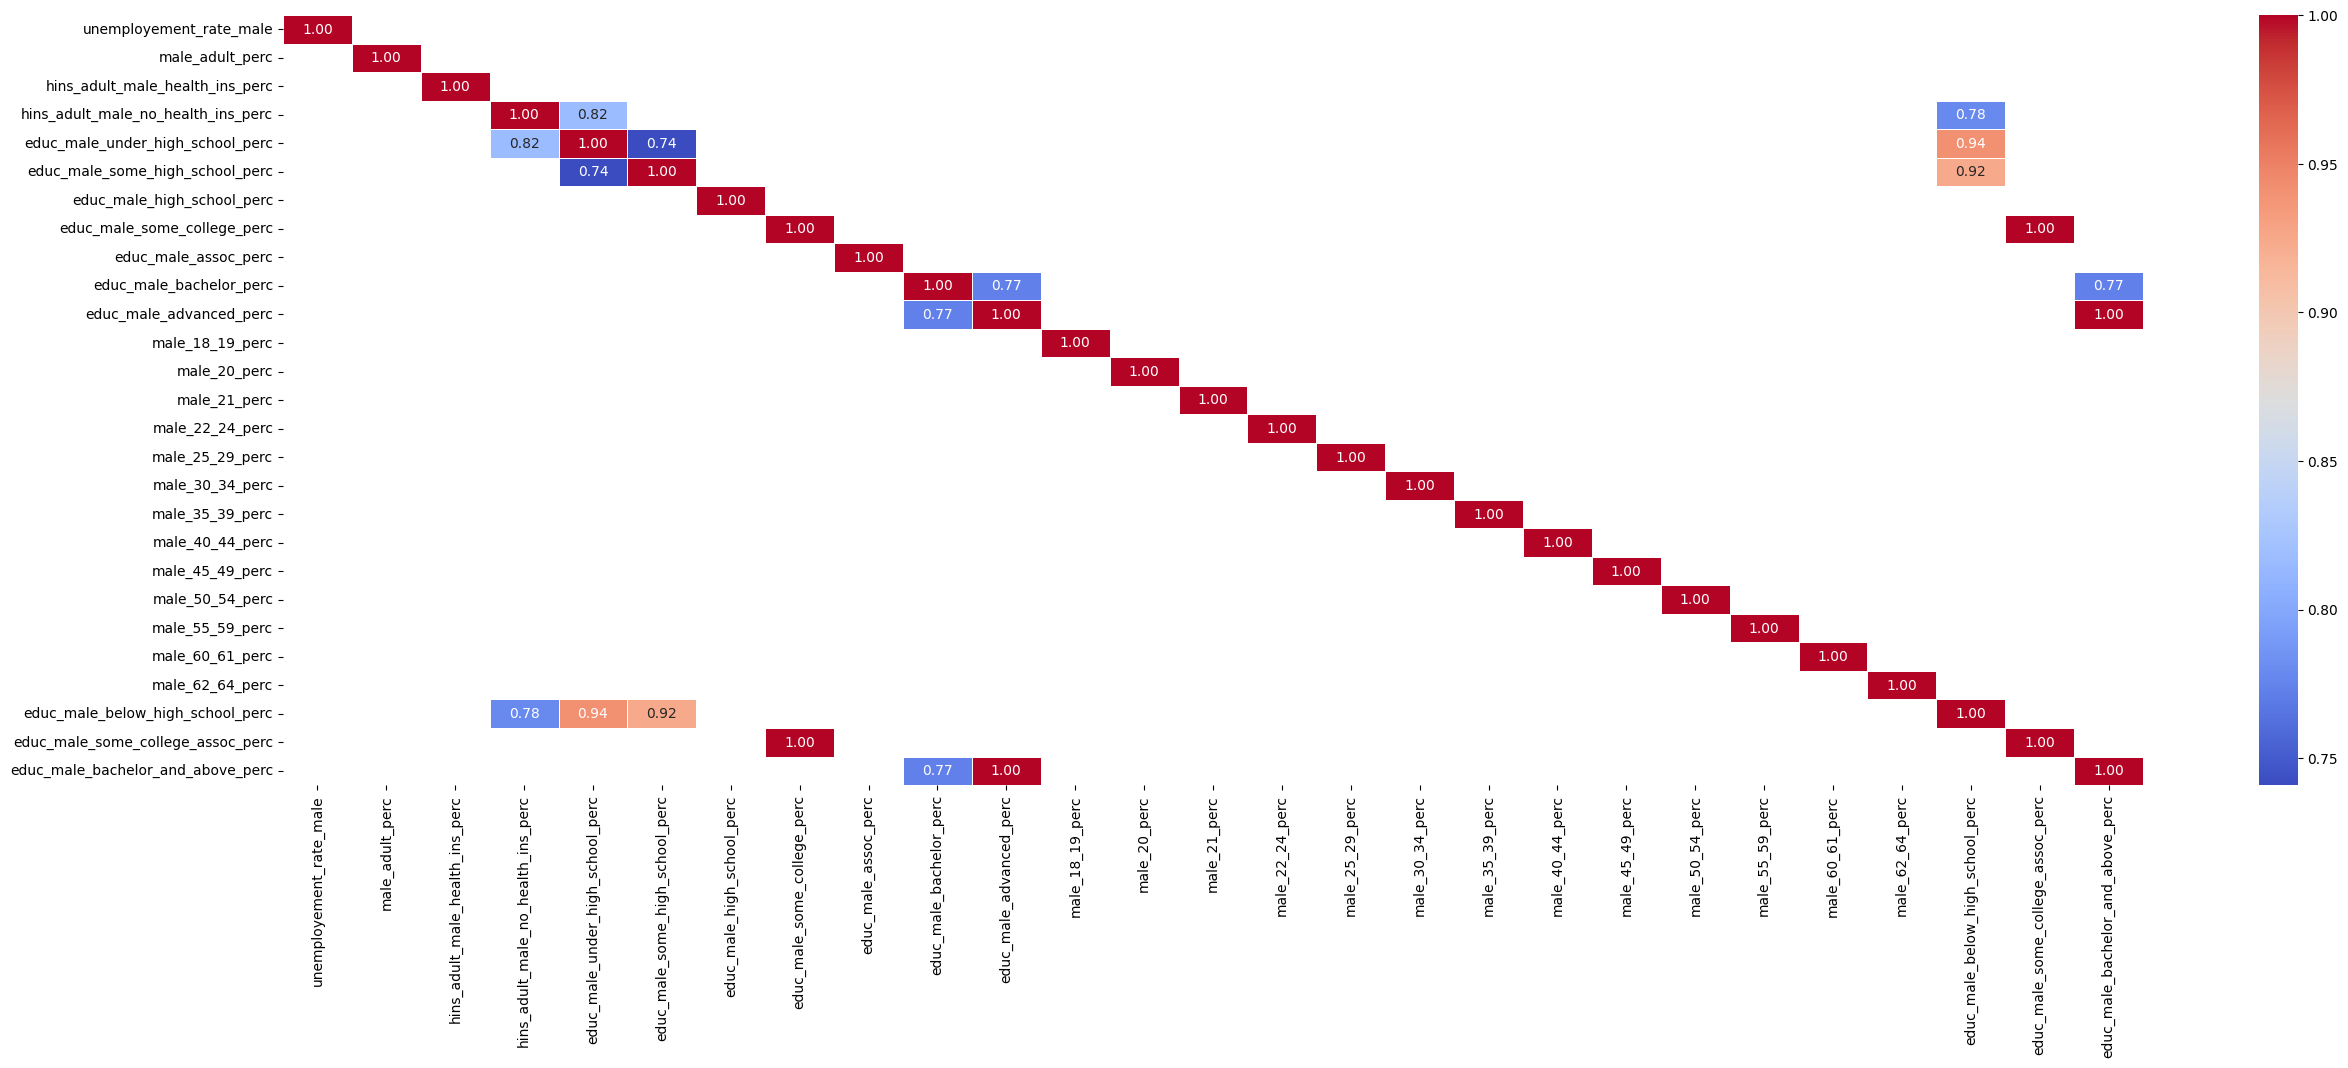

In [98]:
# re-run correlation matrix
correlation_matrix_male = male_df.corr(method = 'pearson')
high_corr_male = correlation_matrix_male[correlation_matrix_male > 0.7]
high_corr_male.dropna(axis=1, how='all').dropna(axis=0, how='all')

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(high_corr_male,annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

# we can see that after grouping those columns together none of these new columns are correlated with each other so thats a good thing righ! they only correlated with the column we used to create them

**Notes on correlation matrix:**

*   the new education columns are not strongly correlated. So perhaps that did fix the multicolinear issues.

* Next Steps:
  * run a model with these new features and follow iterative process




In [99]:
# iteration 1: run model using only these new education columns

# creating formula for multilinear regression model
male_formula_1 = 'unemployement_rate_male ~  hins_adult_male_no_health_ins_perc + educ_male_below_high_school_perc + educ_male_high_school_perc + educ_male_some_college_assoc_perc + educ_male_bachelor_and_above_perc + male_18_19_perc + male_20_perc + male_21_perc + male_22_24_perc + male_25_29_perc + male_30_34_perc+ male_35_39_perc  + male_40_44_perc +  male_45_49_perc +  male_50_54_perc  +  male_55_59_perc  + male_60_61_perc  + male_62_64_perc'
# fit new model
male_model_1 = smf.ols(formula=male_formula_1, data=male_df).fit()
# show model summary statistics
print(male_model_1.summary())


                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.510
Model:                                 OLS   Adj. R-squared:                  0.452
Method:                      Least Squares   F-statistic:                     8.729
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           8.65e-16
Time:                             22:31:17   Log-Likelihood:                 390.24
No. Observations:                      170   AIC:                            -742.5
Df Residuals:                          151   BIC:                            -682.9
Df Model:                               18                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

**Thoughts on Model:**
* remove no health ins
* remove age

In [100]:
# iteration 2: run model using goodish features from previous model
# creating formula for multilinear regression model
male_formula_1 = 'unemployement_rate_male ~ educ_male_below_high_school_perc + educ_male_high_school_perc + educ_male_some_college_assoc_perc +  educ_male_bachelor_and_above_perc'
# fit new model
male_model_1 = smf.ols(formula=male_formula_1, data=male_df).fit()
# show model summary statistics
print(male_model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.432
Model:                                 OLS   Adj. R-squared:                  0.419
Method:                      Least Squares   F-statistic:                     32.37
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           4.73e-20
Time:                             22:31:17   Log-Likelihood:                 385.32
No. Observations:                      175   AIC:                            -760.6
Df Residuals:                          170   BIC:                            -744.8
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

**Thoughts on Model:**


* remove hs
* remove bachelor and above
  



In [101]:
# iteration 3: run model using previous model's good features

# creating formula for multilinear regression model
male_formula_1 = 'unemployement_rate_male ~  educ_male_below_high_school_perc + educ_male_some_college_assoc_perc'
# fit new model
male_model_1 = smf.ols(formula=male_formula_1, data=male_df).fit()
# show model summary statistics
print(male_model_1.summary())

                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.430
Model:                                 OLS   Adj. R-squared:                  0.424
Method:                      Least Squares   F-statistic:                     64.99
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           9.50e-22
Time:                             22:31:17   Log-Likelihood:                 385.03
No. Observations:                      175   AIC:                            -764.1
Df Residuals:                          172   BIC:                            -754.6
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

Compare this model with the last model from optimization 0 next steps

## Optimization 2: group original columns into features I actually think will be useful for the model like young adult, adult, mid age adult, senior, no highschool diploma, highschool diploma, etc and rerun model*

In [102]:
# grouping the male age columns into the different age groups
male_df['total_male_young_adults'] = tmp[['male_18_19', 'male_20', 'male_21', 'male_22_24']].sum(axis=1)
male_df['total_young_adults'] = tmp[['total_18_19', 'total_20', 'total_21', 'total_22_24']].sum(axis=1)
male_df ['male_young_adults_perc'] = male_df['total_male_young_adults']/ male_df['total_young_adults']

male_df['total_male_adults'] = tmp[['male_25_29', 'male_30_34', 'male_35_39', 'male_40_44']].sum(axis=1)
male_df['total_adults'] = tmp[['total_25_29', 'total_30_34', 'total_35_39', 'total_40_44']].sum(axis=1)
male_df['male_adults_perc'] = male_df['total_male_adults']  / male_df['total_adults']

male_df['total_male_mid_age_adults'] = tmp[['male_45_49', 'male_50_54', 'male_55_59']].sum(axis=1)
male_df['total_mid_age_adults'] = tmp[['total_45_49', 'total_50_54', 'total_55_59']].sum(axis=1)
male_df['male_mid_age_perc'] = male_df['total_male_mid_age_adults'] / male_df['total_mid_age_adults']

male_df['total_male_senior'] =  tmp[['male_60_61', 'male_62_64']].sum(axis=1)
male_df['total_senior'] = tmp[['total_60_61', 'total_62_64']].sum(axis=1)
male_df['male_senior_perc'] = male_df['total_male_senior'] / male_df['total_senior']

# education columns were grouped from previous optimization attempt

In [103]:
# iteration 1: create model again with these new variables
male_formula_2= 'unemployement_rate_male ~  hins_adult_male_no_health_ins_perc + educ_male_below_high_school_perc + educ_male_high_school_perc + educ_male_some_college_assoc_perc + educ_male_bachelor_and_above_perc  + male_young_adults_perc + male_adults_perc + male_mid_age_perc + male_senior_perc'

# fit the model
male_model_2 = smf.ols(formula=male_formula_2, data=male_df).fit()

# model summary report
print(male_model_2.summary())


                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.458
Model:                                 OLS   Adj. R-squared:                  0.429
Method:                      Least Squares   F-statistic:                     15.43
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           4.63e-18
Time:                             22:31:17   Log-Likelihood:                 389.10
No. Observations:                      174   AIC:                            -758.2
Df Residuals:                          164   BIC:                            -726.6
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

**Thoughts on Model:**


*   remove age


In [104]:
# iteration 2: create model with the goodish features from previous model
male_formula_2= 'unemployement_rate_male ~   educ_male_below_high_school_perc + educ_male_high_school_perc + educ_male_some_college_assoc_perc +  educ_male_bachelor_and_above_perc'

# fit the model
male_model_2 = smf.ols(formula=male_formula_2, data=male_df).fit()

# model summary report
print(male_model_2.summary())



                               OLS Regression Results                              
Dep. Variable:     unemployement_rate_male   R-squared:                       0.432
Model:                                 OLS   Adj. R-squared:                  0.419
Method:                      Least Squares   F-statistic:                     32.37
Date:                     Thu, 07 Dec 2023   Prob (F-statistic):           4.73e-20
Time:                             22:31:17   Log-Likelihood:                 385.32
No. Observations:                      175   AIC:                            -760.6
Df Residuals:                          170   BIC:                            -744.8
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

## Optimization 3: Checking Distribution of Columns

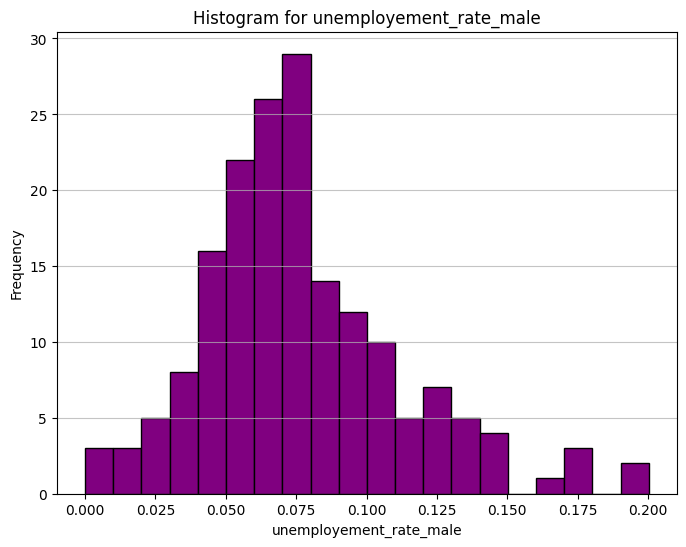

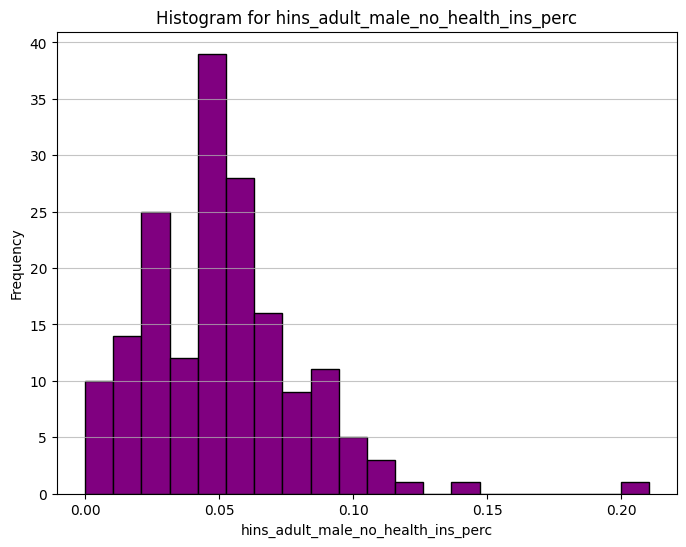

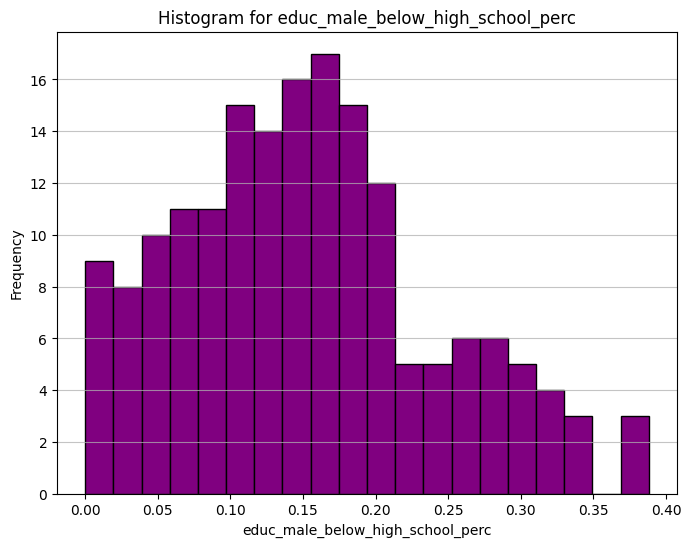

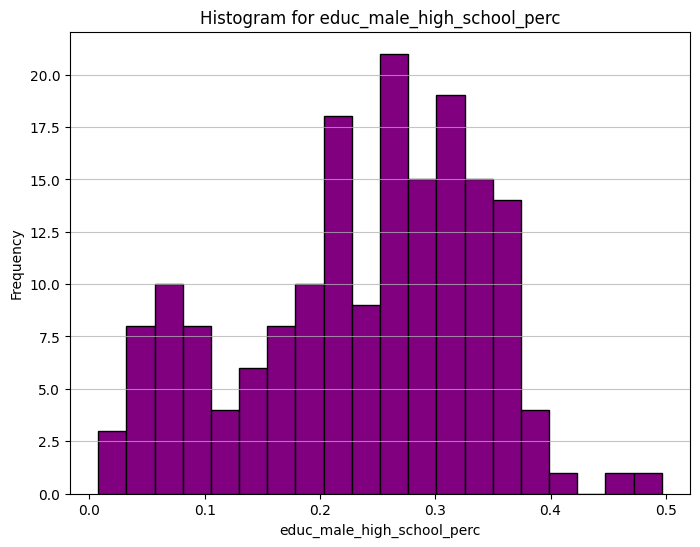

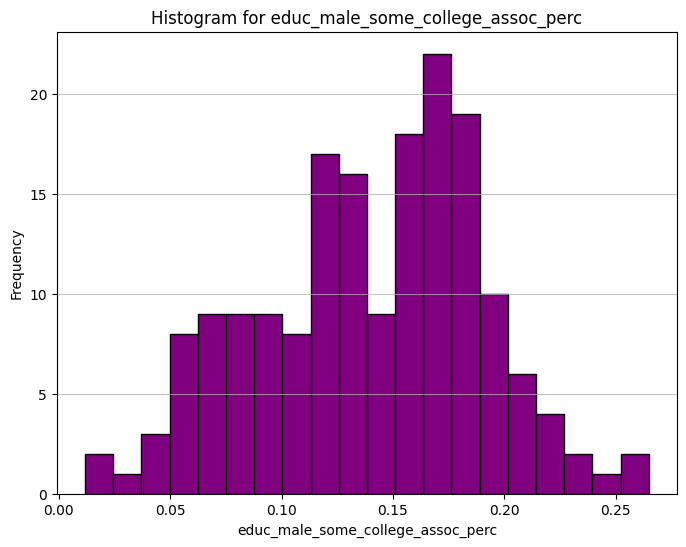

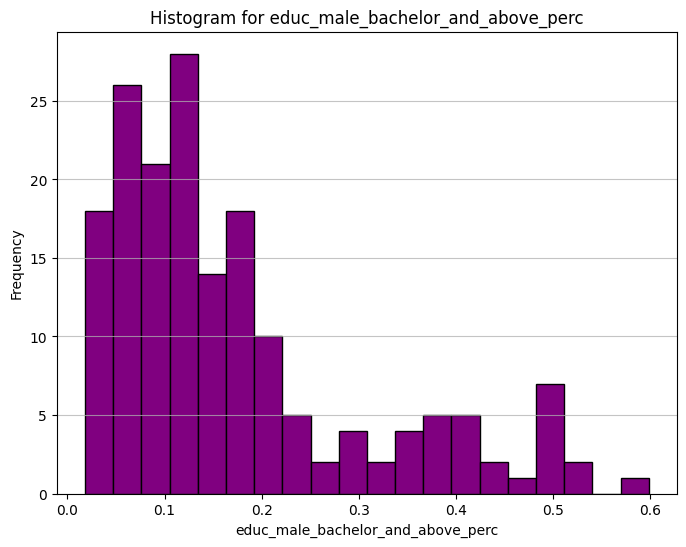

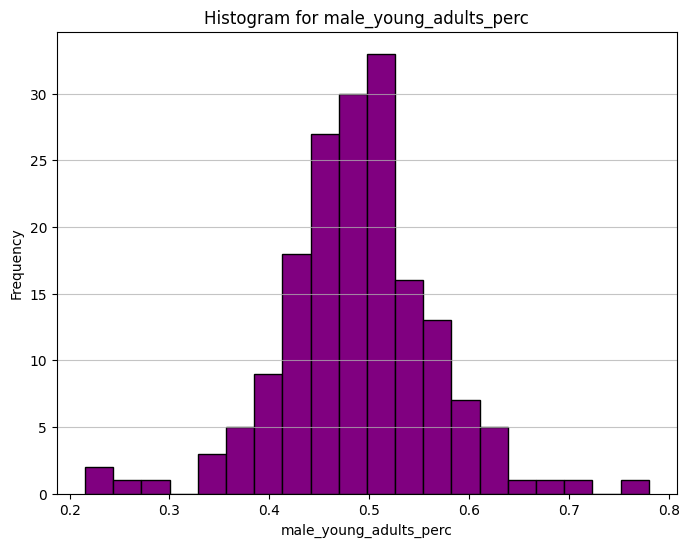

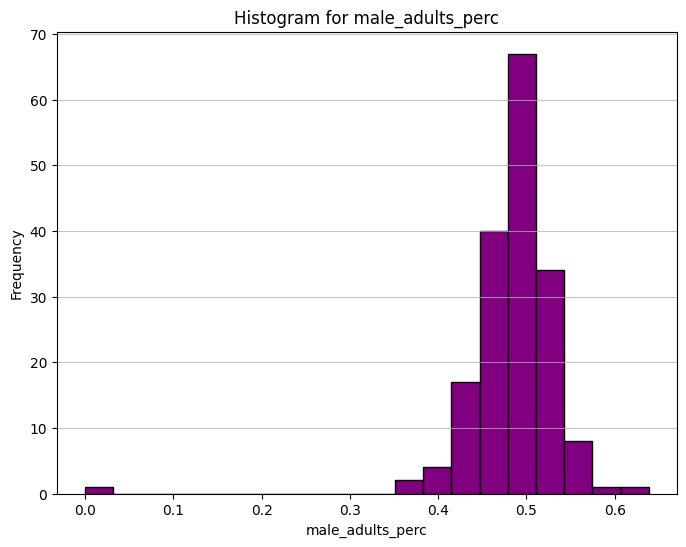

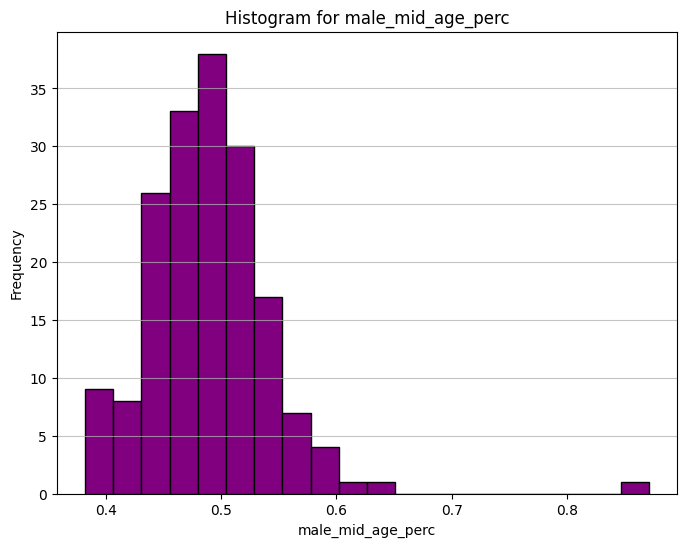

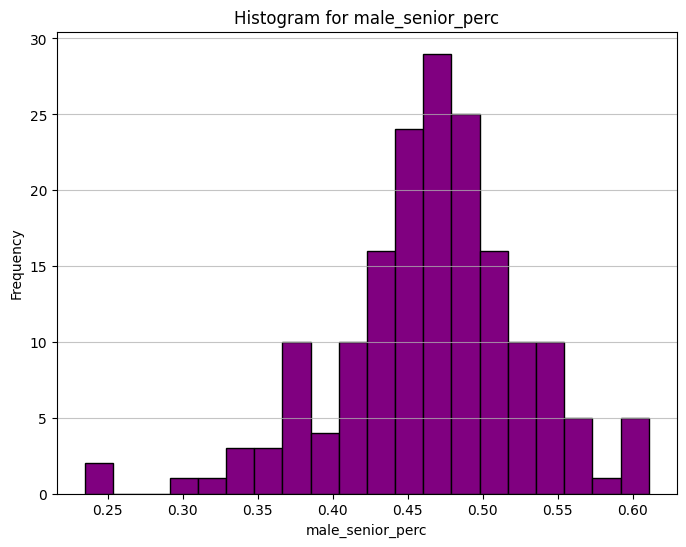

In [105]:
# Assuming 'your_dataframe' is your DataFrame with the specified columns
columns_to_plot = ['unemployement_rate_male','hins_adult_male_no_health_ins_perc',
                   'educ_male_below_high_school_perc', 'educ_male_high_school_perc' , 'educ_male_some_college_assoc_perc' , 'educ_male_bachelor_and_above_perc',
                   'male_young_adults_perc', 'male_adults_perc', 'male_mid_age_perc', 'male_senior_perc']

# Create individual plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(male_df[column], bins=20, color='purple', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [106]:
# make a copy of male dataframe  in case we mess up with scaling
male_df_copy = male_df

In [107]:
# scale the columns

# this ensures that a feature does not dominate because it has a large scale
columns_to_scale_male = ['unemployement_rate_male','hins_adult_male_no_health_ins_perc',
                   'educ_male_below_high_school_perc', 'educ_male_high_school_perc' , 'educ_male_some_college_assoc_perc' , 'educ_male_bachelor_and_above_perc',
                   'male_young_adults_perc', 'male_adults_perc', 'male_mid_age_perc', 'male_senior_perc']

# Iterate over columns and create new scaled columns
for column in columns_to_scale_male:
    min_value = male_df_copy[column].min()
    max_value = male_df_copy[column].max()
    new_column_name = 'scaled_' + column
    male_df_copy[new_column_name] = (male_df_copy[column] - min_value) / (max_value - min_value)

male_df_copy


,unemployement_rate_male,male_adult_perc,hins_adult_male_health_ins_perc,hins_adult_male_no_health_ins_perc,educ_male_under_high_school_perc,educ_male_some_high_school_perc,educ_male_high_school_perc,educ_male_some_college_perc,educ_male_assoc_perc,educ_male_bachelor_perc,...,scaled_unemployement_rate_male,scaled_hins_adult_male_no_health_ins_perc,scaled_educ_male_below_high_school_perc,scaled_educ_male_high_school_perc,scaled_educ_male_some_college_assoc_perc,scaled_educ_male_bachelor_and_above_perc,scaled_male_young_adults_perc,scaled_male_adults_perc,scaled_male_mid_age_perc,scaled_male_senior_perc
0,0.045460,0.354483,0.446549,0.020761,0.037194,0.042901,0.085408,0.071829,0.010824,0.428220,...,0.226996,0.098720,0.206322,0.159174,0.237270,0.526554,0.220710,0.744797,0.229409,0.644682
1,0.072944,0.321663,0.464380,0.040667,0.132331,0.180647,0.196048,0.100054,0.030935,0.265434,...,0.364234,0.193378,0.806225,0.385431,0.348842,0.131526,0.500154,0.802629,0.289100,0.468499
2,0.037587,0.393667,0.486857,0.020804,0.028751,0.012585,0.057093,0.058219,0.034532,0.424311,...,0.187684,0.098927,0.106481,0.101270,0.183470,0.631495,0.358723,0.823512,0.376997,0.706785
3,0.000523,0.386653,0.522553,0.001418,0.006058,0.000505,0.007572,0.024230,0.004038,0.456840,...,0.002610,0.006745,0.016904,0.000000,0.049115,0.832291,0.000000,0.908032,0.147252,0.965953
4,0.035416,0.414033,0.474585,0.000000,0.000605,0.000000,0.049334,0.011804,0.012409,0.551755,...,0.176842,0.000000,0.001559,0.085403,0.000000,0.613785,0.319088,0.698910,0.549754,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.108612,0.254192,0.383463,0.077851,0.084670,0.100861,0.290672,0.170886,0.079513,0.134997,...,0.542340,0.370196,0.477924,0.578937,0.628856,0.207128,0.450916,0.730294,0.155666,0.593969
173,0.101682,0.272820,0.418204,0.042114,0.085746,0.074501,0.348327,0.209587,0.058898,0.104442,...,0.507735,0.200257,0.412794,0.696842,0.781855,0.172827,0.644208,0.682184,0.179170,0.522614
174,0.117179,0.249240,0.375395,0.042426,0.064605,0.079322,0.275630,0.172113,0.071838,0.203791,...,0.585114,0.201745,0.370751,0.548176,0.633758,0.197378,0.391988,0.637601,0.034888,0.683589
175,0.107959,0.302826,0.489326,0.018035,0.037575,0.059995,0.274173,0.168712,0.049975,0.232590,...,0.539076,0.085758,0.251339,0.545197,0.620271,0.273684,0.612898,0.773315,0.245615,0.834321


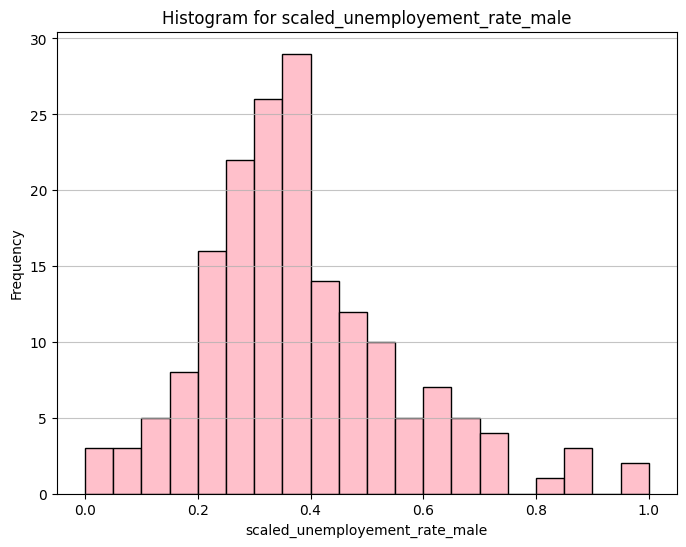

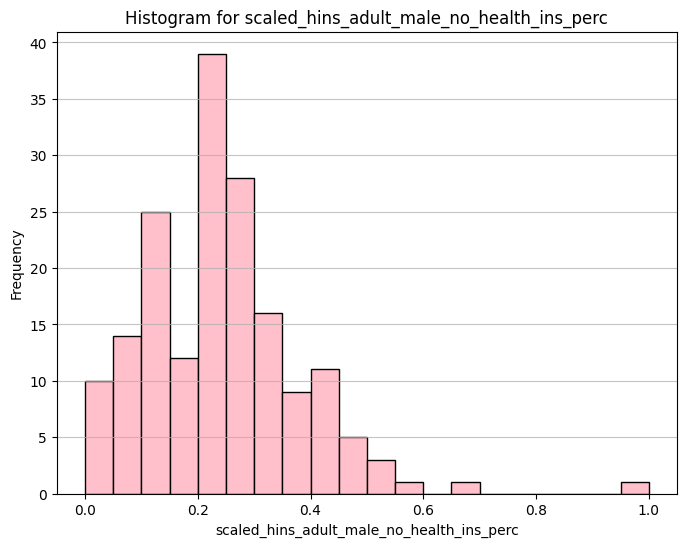

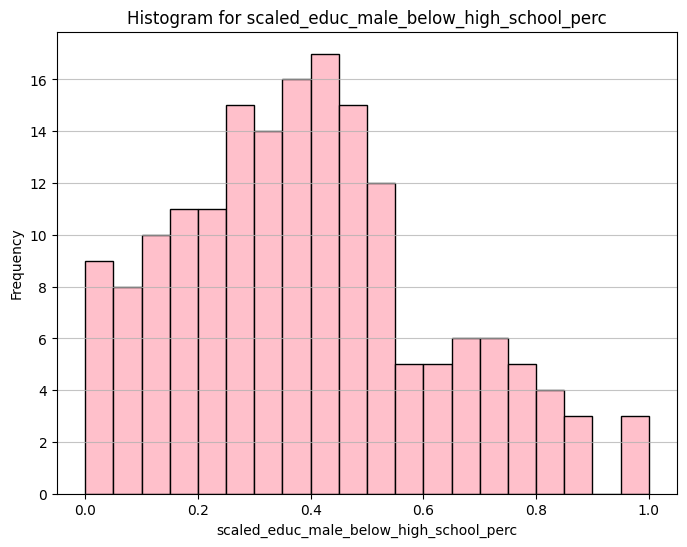

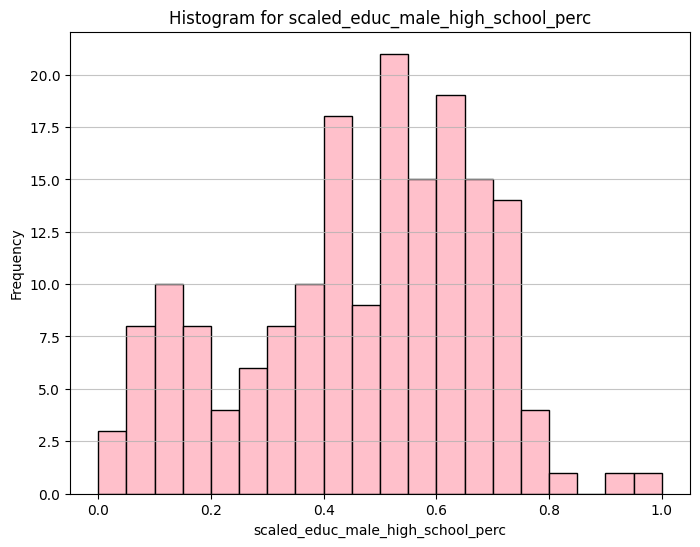

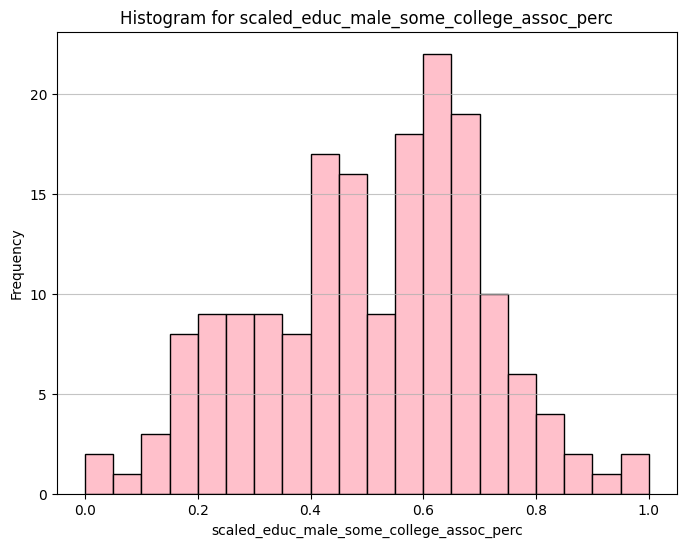

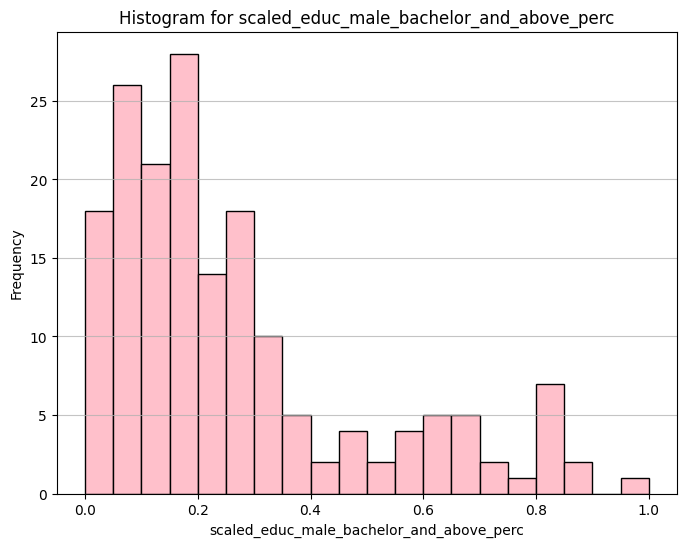

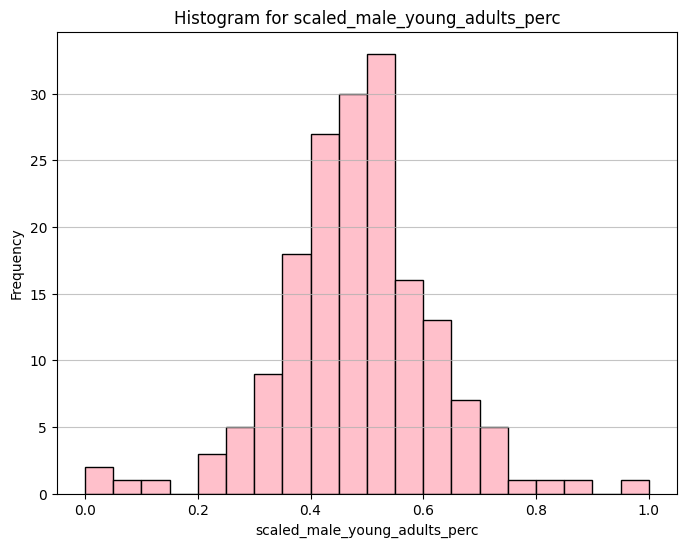

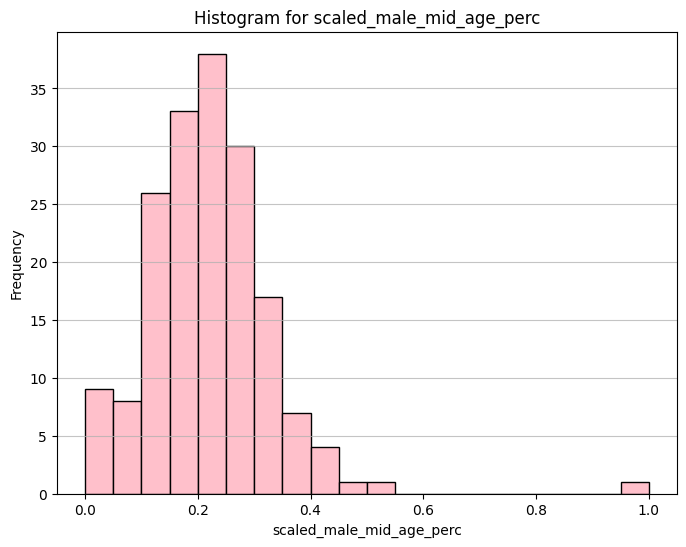

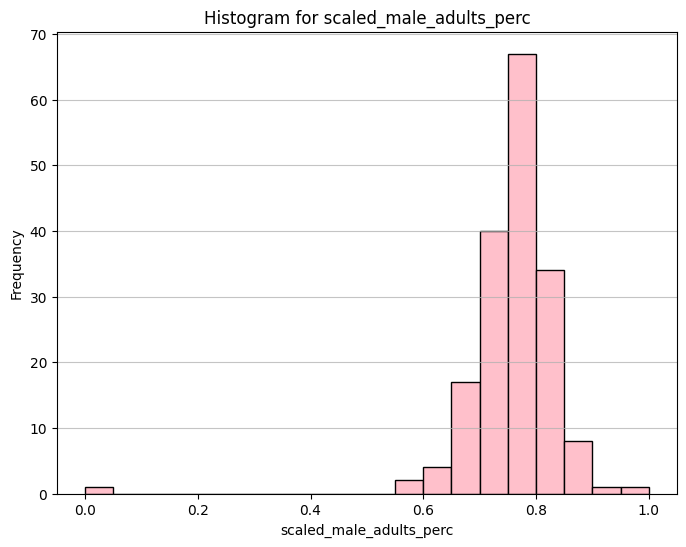

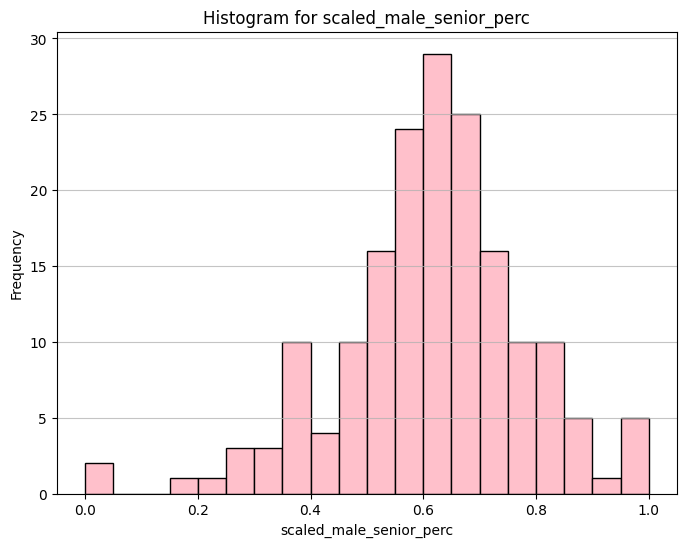

In [108]:
# re-run histogram and observe the effects of scaling, did it affect the skewness
scaled_columns_to_plot_male = [ 'scaled_unemployement_rate_male',  'scaled_hins_adult_male_no_health_ins_perc',
                   'scaled_educ_male_below_high_school_perc', 'scaled_educ_male_high_school_perc' , 'scaled_educ_male_some_college_assoc_perc' , 'scaled_educ_male_bachelor_and_above_perc', 'scaled_male_young_adults_perc', 'scaled_male_mid_age_perc', 'scaled_male_adults_perc',
                   'scaled_male_senior_perc']

# Create histograms for each column
for column in scaled_columns_to_plot_male:
    plt.figure(figsize=(8, 6))
    plt.hist(male_df_copy[column], bins=20, color='pink', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [109]:
# create model with these scaled up columns and compare results with previous optimized model

# create model and run it
male_formula_3 = 'scaled_unemployement_rate_male ~  scaled_hins_adult_male_no_health_ins_perc + scaled_educ_male_below_high_school_perc + scaled_educ_male_high_school_perc + scaled_educ_male_some_college_assoc_perc + scaled_educ_male_bachelor_and_above_perc + scaled_male_young_adults_perc + scaled_male_mid_age_perc + scaled_male_senior_perc'

# fitting the model
male_model_3 = smf.ols(formula=male_formula_3, data=male_df_copy).fit()

# model summary
print(male_model_3.summary())

                                  OLS Regression Results                                  
Dep. Variable:     scaled_unemployement_rate_male   R-squared:                       0.454
Model:                                        OLS   Adj. R-squared:                  0.428
Method:                             Least Squares   F-statistic:                     17.16
Date:                            Thu, 07 Dec 2023   Prob (F-statistic):           2.02e-18
Time:                                    22:31:26   Log-Likelihood:                 108.58
No. Observations:                             174   AIC:                            -199.2
Df Residuals:                                 165   BIC:                            -170.7
Df Model:                                       8                                         
Covariance Type:                        nonrobust                                         
                                                coef    std err          t      P>|t|     

**Thoughts on model:**

* remove age and health insur



In [110]:
# iteration 2 using the goodish scaled features from previous model

# create model and run it
male_formula_3 = 'scaled_unemployement_rate_male ~ scaled_educ_male_below_high_school_perc + scaled_educ_male_high_school_perc + scaled_educ_male_some_college_assoc_perc + scaled_educ_male_bachelor_and_above_perc'

# fitting the model
male_model_3 = smf.ols(formula=male_formula_3, data=male_df_copy).fit()

# model summary
print(male_model_3.summary())

                                  OLS Regression Results                                  
Dep. Variable:     scaled_unemployement_rate_male   R-squared:                       0.432
Model:                                        OLS   Adj. R-squared:                  0.419
Method:                             Least Squares   F-statistic:                     32.37
Date:                            Thu, 07 Dec 2023   Prob (F-statistic):           4.73e-20
Time:                                    22:31:26   Log-Likelihood:                 103.90
No. Observations:                             175   AIC:                            -197.8
Df Residuals:                                 170   BIC:                            -182.0
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                                               coef    std err          t      P>|t|      

**Thoughts on model:**

*  remove hs and bachelor

In [111]:
# iteration 3 using the goodish scaled features from previous model

# create model and run it
male_formula_3 = 'scaled_unemployement_rate_male ~ scaled_educ_male_below_high_school_perc + scaled_educ_male_some_college_assoc_perc'

# fitting the model
male_model_3 = smf.ols(formula=male_formula_3, data=male_df_copy).fit()

# model summary
print(male_model_3.summary())

                                  OLS Regression Results                                  
Dep. Variable:     scaled_unemployement_rate_male   R-squared:                       0.430
Model:                                        OLS   Adj. R-squared:                  0.424
Method:                             Least Squares   F-statistic:                     64.99
Date:                            Thu, 07 Dec 2023   Prob (F-statistic):           9.50e-22
Time:                                    22:31:26   Log-Likelihood:                 103.61
No. Observations:                             175   AIC:                            -201.2
Df Residuals:                                 172   BIC:                            -191.7
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                               coef    std err          t      P>|t|      